In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

path = r'/content/drive/MyDrive/final data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    dtype_dic= { 'Art - FDIR (kode)':str, 'Art - gruppe (kode)':str, 'Art - hovedgruppe (kode)':str, 'Fangstfelt (kode)':str}
    df = pd.read_csv(filename, index_col=None, header=0,dtype = dtype_dic)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
frame.shape

(21773141, 21)

In [ ]:
frame.head(10)

,Unnamed: 0,Fartøy ID,Største lengde,Motorkraft,Bruttotonnasje annen,Redskap (kode),Fartøykommune (kode),Art - FDIR (kode),Art - gruppe (kode),Art - hovedgruppe (kode),Landingskommune (kode),Siste fangstdato,Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),Produktvekt,tonnage_length_ratio,log_length,log_tonnage
0,0,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1032,0203,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,211.0,269.0,0.641825,2.117460,1.674020
1,1,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1032,0203,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,210.0,6.0,0.641825,2.117460,1.674020
2,2,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1022,0201,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,211.0,4.0,0.641825,2.117460,1.674020
3,3,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1022,0201,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,8.0,0.705882,2.140066,1.791759
4,4,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1022,0201,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,7.5,0.705882,2.140066,1.791759
5,5,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1034,0220,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,13.0,0.705882,2.140066,1.791759
6,6,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,0.5,0.705882,2.140066,1.791759
7,7,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,6.0,0.705882,2.140066,1.791759
8,8,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1027,0202,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,0.5,0.705882,2.140066,1.791759
9,9,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-11-14,80920,8.0,10.5,59.25,210.0,3.0,0.705882,2.140066,1.791759


In [ ]:
frame['Art - FDIR (kode)'].value_counts()

102202    5765821
1032      2570376
102701    1489935
1022      1319624
1023       982357
           ...   
102704          1
3612            1
0430            1
2826            1
0311            1
Name: Art - FDIR (kode), Length: 180, dtype: int64

In [ ]:
frame['Fangstfelt (kode)'].nunique()

1220

In [ ]:
frame[frame['Kyst/hav (kode)'] == 8]['Fangstfelt (kode)'].nunique()

151

In [ ]:
frame[frame['Kyst/hav (kode)'] == 0]['Fangstfelt (kode)'].nunique()

1069

## problem: out of 21 million entries 1 million entries have product weight equal to zero inspite of all other info

In [ ]:
len(frame[frame['Produktvekt'] == 0])

1008687

## since we cannot do much about these entries we remove them

In [ ]:
# get names of indexes for which
# column product weight has value 0
index_names = frame[ frame['Produktvekt'] == 0 ].index
  
# drop these row indexes
# from dataFrame
frame.drop(index_names, inplace = True)
  
frame.shape

(20764454, 21)

In [ ]:
len(frame[frame['Produktvekt'] == 0])

0

In [ ]:
frame.corr()

,Unnamed: 0,Fartøy ID,Største lengde,Motorkraft,Bruttotonnasje annen,Redskap (kode),Fartøykommune (kode),Landingskommune (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),Produktvekt,tonnage_length_ratio,log_length,log_tonnage
Unnamed: 0,1.000000,-0.066937,-0.036736,-0.037897,-0.037174,0.101431,-0.268612,-0.251328,-0.051723,-0.356478,-0.350802,0.015981,-0.014318,-0.037762,-0.034901,-0.029523
Fartøy ID,-0.066937,1.000000,0.074051,0.164608,0.122389,0.045089,0.065348,0.059695,-0.062873,0.009712,-0.035219,-0.049699,0.031442,0.139562,0.031686,0.073388
Største lengde,-0.036736,0.074051,1.000000,0.887079,0.798970,0.250568,-0.003486,0.057913,-0.558868,-0.025769,0.044183,-0.012725,0.282394,0.884492,0.931152,0.912331
Motorkraft,-0.037897,0.164608,0.887079,1.000000,0.869663,0.182735,0.011118,0.051223,-0.478958,-0.022411,0.042715,-0.026603,0.308630,0.892433,0.735076,0.729311
Bruttotonnasje annen,-0.037174,0.122389,0.798970,0.869663,1.000000,0.112416,0.016323,0.038929,-0.406705,-0.027633,0.041514,-0.018617,0.280078,0.970286,0.602099,0.611075
Redskap (kode),0.101431,0.045089,0.250568,0.182735,0.112416,1.000000,-0.197348,-0.132641,-0.152638,-0.068151,-0.273779,-0.110841,-0.008090,0.179882,0.302752,0.316418
Fartøykommune (kode),-0.268612,0.065348,-0.003486,0.011118,0.016323,-0.197348,1.000000,0.634768,0.021565,0.367133,0.493891,0.050061,-0.006449,0.014892,-0.012580,-0.015627
Landingskommune (kode),-0.251328,0.059695,0.057913,0.051223,0.038929,-0.132641,0.634768,1.000000,-0.098478,0.269478,0.336504,0.024803,0.026697,0.047951,0.053763,0.049004
Kyst/hav (kode),-0.051723,-0.062873,-0.558868,-0.478958,-0.406705,-0.152638,0.021565,-0.098478,1.000000,0.102680,0.048401,-0.007301,-0.136437,-0.474675,-0.523402,-0.514927
Lon (lokasjon),-0.356478,0.009712,-0.025769,-0.022411,-0.027633,-0.068151,0.367133,0.269478,0.102680,1.000000,0.810852,0.028023,-0.064464,-0.027169,-0.009826,-0.014446


In [ ]:
frame.dtypes

Unnamed: 0                    int64
Fartøy ID                   float64
Største lengde              float64
Motorkraft                  float64
Bruttotonnasje annen        float64
Redskap (kode)              float64
Fartøykommune (kode)        float64
Art - FDIR (kode)            object
Art - gruppe (kode)          object
Art - hovedgruppe (kode)     object
Landingskommune (kode)      float64
Siste fangstdato             object
Fangstfelt (kode)            object
Kyst/hav (kode)             float64
Lon (lokasjon)              float64
Lat (lokasjon)              float64
Produkttilstand (kode)      float64
Produktvekt                 float64
tonnage_length_ratio        float64
log_length                  float64
log_tonnage                 float64
dtype: object

## correct the date column format

In [ ]:
frame['Siste fangstdato'].dtype

dtype('O')

In [ ]:
frame['Siste fangstdato'] = pd.to_datetime(frame['Siste fangstdato'])

In [ ]:
frame['Siste fangstdato'].dtype

dtype('<M8[ns]')

In [ ]:
frame['Siste fangstdato'].head(10)

0   2001-08-05
1   2001-08-05
2   2001-08-05
3   2001-09-21
4   2001-09-21
5   2001-09-21
6   2001-09-21
7   2001-09-21
8   2001-09-21
9   2001-11-14
Name: Siste fangstdato, dtype: datetime64[ns]

In [ ]:
frame.dtypes

Unnamed: 0                           int64
Fartøy ID                          float64
Største lengde                     float64
Motorkraft                         float64
Bruttotonnasje annen               float64
Redskap (kode)                     float64
Fartøykommune (kode)               float64
Art - FDIR (kode)                   object
Art - gruppe (kode)                 object
Art - hovedgruppe (kode)            object
Landingskommune (kode)             float64
Siste fangstdato            datetime64[ns]
Fangstfelt (kode)                   object
Kyst/hav (kode)                    float64
Lon (lokasjon)                     float64
Lat (lokasjon)                     float64
Produkttilstand (kode)             float64
Produktvekt                        float64
tonnage_length_ratio               float64
log_length                         float64
log_tonnage                        float64
dtype: object

## Adding a year column and a month column so that we can remove the exact date column(Siste fangstdato) and convert month to specific seasons

In [ ]:
frame['year'] = pd.DatetimeIndex(frame['Siste fangstdato']).year

In [ ]:
frame['month'] = pd.DatetimeIndex(frame['Siste fangstdato']).month

In [ ]:
frame.dtypes

Unnamed: 0                           int64
Fartøy ID                          float64
Største lengde                     float64
Motorkraft                         float64
Bruttotonnasje annen               float64
Redskap (kode)                     float64
Fartøykommune (kode)               float64
Art - FDIR (kode)                   object
Art - gruppe (kode)                 object
Art - hovedgruppe (kode)            object
Landingskommune (kode)             float64
Siste fangstdato            datetime64[ns]
Fangstfelt (kode)                   object
Kyst/hav (kode)                    float64
Lon (lokasjon)                     float64
Lat (lokasjon)                     float64
Produkttilstand (kode)             float64
Produktvekt                        float64
tonnage_length_ratio               float64
log_length                         float64
log_tonnage                        float64
year                                 int64
month                                int64
dtype: obje

In [ ]:
# frame.to_csv('complete_data.csv')

In [ ]:
df_year_productvekt = frame.groupby(['year'])['Produktvekt'].agg('sum').rename_axis('year').reset_index(name='total_productvekt')

In [ ]:
df_year_productvekt

,year,total_productvekt
0,2001,2.342291e+09
1,2002,2.419760e+09
2,2003,2.245563e+09
3,2004,2.214487e+09
4,2005,2.113056e+09
5,2006,1.997853e+09
6,2007,2.135783e+09
7,2008,2.171750e+09
8,2009,2.289030e+09
9,2010,2.349505e+09


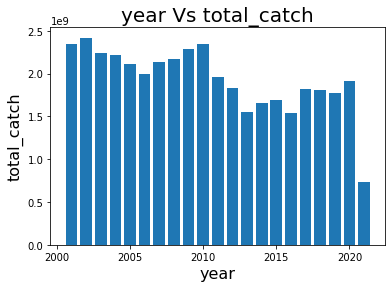

In [ ]:
plt.bar(df_year_productvekt['year'], df_year_productvekt['total_productvekt'])
plt.title("year Vs total_catch", fontsize = 20)
plt.xlabel('year', fontsize=16)
plt.ylabel('total_catch', fontsize=16)
plt.show()

## for the model we analyse certain columns

In [ ]:
df_model = frame[['Største lengde','Redskap (kode)','Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)','Lon (lokasjon)','Lat (lokasjon)','Produkttilstand (kode)','month','Produktvekt']]

In [ ]:
df_model.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
0,8.31,33.0,1032,80719,8.0,6.5,63.25,211.0,8,269.0
1,8.31,33.0,1032,80719,8.0,6.5,63.25,210.0,8,6.0
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
5,8.50,21.0,1034,80920,8.0,10.5,59.25,210.0,9,13.0
6,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,0.5
7,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,6.0
8,8.50,21.0,1027,80920,8.0,10.5,59.25,210.0,9,0.5
9,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,11,3.0


In [ ]:
df_model.shape

(20764454, 10)

## Since we are creating a model for very small vessels (length < 10m) we take that subset of data

In [ ]:
len(df_model[df_model['Største lengde'] < 10])

6276647

In [ ]:
df_model_very_small = df_model[df_model['Største lengde'] < 10]
df_model_very_small.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
0,8.31,33.0,1032,80719,8.0,6.5,63.25,211.0,8,269.0
1,8.31,33.0,1032,80719,8.0,6.5,63.25,210.0,8,6.0
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
5,8.50,21.0,1034,80920,8.0,10.5,59.25,210.0,9,13.0
6,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,0.5
7,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,6.0
8,8.50,21.0,1027,80920,8.0,10.5,59.25,210.0,9,0.5
9,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,11,3.0


## for this moment we are just focussing on one particular species:TORSK - we just need to do for a particular species - torsk (ART-FDIR CODE = 1022,102201,102202,102204)

In [ ]:
df_1022 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '1022']
df_102201 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102201']
df_102202 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102202']
df_102204 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102204']

pdList = [df_1022,df_102201, df_102202,df_102204]  
df_model_torsk = pd.concat(pdList)

## torsk - very_small model dataframe

In [ ]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
25,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,4.0
26,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,4.0
27,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,8.0
33,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,2.5
34,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,15.0
35,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,8.0
36,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,7.0


In [ ]:
df_model_torsk.shape

(2363304, 10)

In [ ]:
df_model_torsk['Produktvekt'].min()

0.1

In [ ]:
df_model_torsk['Produktvekt'].max()

11704.0

In [ ]:
df_model_torsk['Produktvekt'].describe()

count    2.363304e+06
mean     1.268282e+02
std      2.531986e+02
min      1.000000e-01
25%      1.200000e+01
50%      4.000000e+01
75%      1.230000e+02
max      1.170400e+04
Name: Produktvekt, dtype: float64

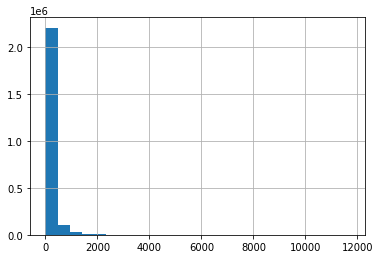

In [ ]:
df_model_torsk['Produktvekt'].hist(bins = 25)

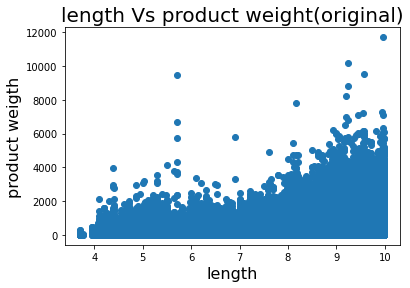

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

## Handling noise

In [ ]:
df_model_torsk['gear_code_frequency'] = df_model_torsk['Redskap (kode)'].map(df_model_torsk['Redskap (kode)'].value_counts())
df_model_torsk['product_condition_code_frequency'] = df_model_torsk['Produkttilstand (kode)'].map(df_model_torsk['Produkttilstand (kode)'].value_counts())

filtering on the basis of gear frequency - contain those with >= 1000 occurences.

filtering on the basis of product condition code frequency - contain those with >= 1000 occurences.

In [ ]:
df_model_torsk = df_model_torsk[df_model_torsk['gear_code_frequency'] >= 1000]
df_model_torsk = df_model_torsk[df_model_torsk['product_condition_code_frequency'] >= 1000]

In [ ]:
df_model_torsk = df_model_torsk[['Største lengde', 'Redskap (kode)', 'gear_code_frequency', 'Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)', 'Lon (lokasjon)', 'Lat (lokasjon)',  'Produkttilstand (kode)', 'product_condition_code_frequency', 'month', 'Produktvekt']]
df_model_torsk

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
2,8.31,33.0,931434,1022,80719,8.0,6.50000,63.25000,211.0,1531404,8,4.0
3,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,9,8.0
4,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,9,7.5
25,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,4.0
26,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0
21679626,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0
21679628,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1
21679633,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0


In [ ]:
## l < 9.9' - very_small
## '10-14.9' - small
## 15-20.9 - medium
## 21-27.9 - large
## l > 28 - very_large

distribution_catch = {'catch range':['x <= 10','x <= 2000', '2000 < x <= 4000', '4000 < x <= 6000', '6000 < x <= 8000','8000 < x <= 10000', '10000 < x <= 12000'],
        'Count':[len(df_model_torsk[(df_model_torsk['Produktvekt'] <= 10)]),
                 len(df_model_torsk[(df_model_torsk['Produktvekt'] <= 2000)]),
                len(df_model_torsk[(2000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 4000)]),
                 len(df_model_torsk[(4000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 6000)]),
                len(df_model_torsk[(6000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 8000)]),
                 len(df_model_torsk[(8000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 10000)]),
                 len(df_model_torsk[(10000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 12000)]),
                #  len(frame[( <= df_model_torsk['Produktvekt'])])
                ]}
  
# Create DataFrame
df_catch = pd.DataFrame(distribution_catch)
df_catch

,catch range,Count
0,x <= 10,522531
1,x <= 2000,2353293
2,2000 < x <= 4000,5300
3,4000 < x <= 6000,296
4,6000 < x <= 8000,20
5,8000 < x <= 10000,3
6,10000 < x <= 12000,2


as we see that the distribution is quite dispersed , making certain ranges act like a outlier(noise).

we need to remove '0', '3', '4', '5', '6'

essentially we just need catch from 10kg to 4000kg

In [ ]:
df_model_torsk = df_model_torsk[(10 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 4000)]
df_model_torsk

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
34,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,3,15.0
45,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,15.0
51,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,15.0
85,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,12.5
89,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,100.0,33011,5,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0
21679626,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0
21679628,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1
21679633,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0


In [ ]:
df_model_torsk['Produktvekt'].describe()

count    1.836062e+06
mean     1.606215e+02
std      2.701166e+02
min      1.010000e+01
25%      2.800000e+01
50%      6.400000e+01
75%      1.690000e+02
max      4.000000e+03
Name: Produktvekt, dtype: float64

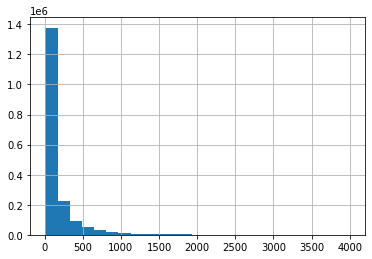

In [ ]:
df_model_torsk['Produktvekt'].hist(bins = 25)

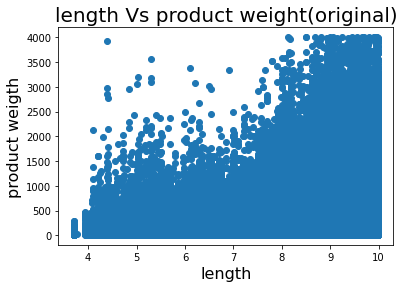

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

## Dividing the model into north and south

In [ ]:
lat = df_model_torsk['Lat (lokasjon)'].values
lon = df_model_torsk['Lon (lokasjon)'].values

In [ ]:
print(max(lat))
print(min(lat))
print(max(lon))
print(min(lon))

71.75
56.25
41.0
-21.5


## we need to divide the data into 2 parts , for north and for south

## North: (63.75 N, 71.25 N)
## South: (56.25 N, 63.75 N)

In [ ]:
df_model_torsk = df_model_torsk[(63.75 > df_model_torsk['Lat (lokasjon)'])]
df_model_torsk 

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
34,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,3,15.0
45,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,15.0
51,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,15.0
85,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,12.5
89,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,100.0,33011,5,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21678519,8.70,20.0,63971,102202,80726,8.0,10.33143,63.3436,211.0,1531404,2,49.0
21678561,8.70,20.0,63971,102202,80726,8.0,10.33143,63.3436,211.0,1531404,1,62.0
21678589,5.98,42.0,5013,102202,80726,8.0,10.33143,63.3436,211.0,1531404,12,55.0
21678596,5.98,42.0,5013,102202,80726,8.0,10.33143,63.3436,211.0,1531404,12,52.0


In [ ]:
lat_south= df_model_torsk['Lat (lokasjon)'].values
lon_south = df_model_torsk['Lon (lokasjon)'].values

In [ ]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     / 148.8MB 1.2MB/s
     |████████████████████████████████| 6.6MB 5.1MB/s 
     |████████████████████████████████| 225kB 43.6MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759602 sha256=2a23bc16e1ca53d9975395c45a8020cd4b9d1c10825cfa4e0733d81a9cdbaa6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3py6oivd/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl 

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 6.3MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702416 sha256=2a12f30e1084a12515898b4b805bfe52d4ce5700fc1796e800b69affee8cedbe
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.1.0
    Uninstalling pyproj-3.1.0:
      Successfully uninstalled pyproj-3.1.0


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

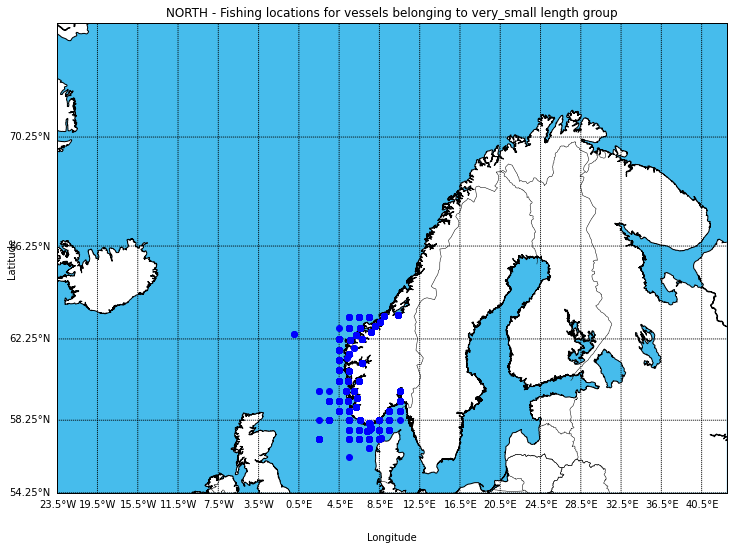

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m1 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m1.drawcoastlines()
m1.drawcountries()
m1.drawstates()
m1.drawmapboundary(fill_color='#46bcec')
m1.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m1(lon_south, lat_south)
# plot points as blue dots
m1.scatter(lons, lats, marker = 'o', color='b', zorder=5)
#plt.legend()
plt.title("NORTH - Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m1.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m1.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

one abnormal location

In [ ]:
# abnormal_location = df_model_torsk[(62.25 < df_model_torsk['Lat (lokasjon)']) & (df_model_torsk['Lon (lokasjon)'] < -19.5)]
# abnormal_location 

## 8 - within 20 nautical miles of the coast 

## 0 - outside 20 nautical miles of the coast

In [ ]:
df_model_torsk['Kyst/hav (kode)'].value_counts()

8.0    221556
0.0      7167
Name: Kyst/hav (kode), dtype: int64

In [ ]:
lat_kyst_8 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 8]['Lat (lokasjon)'].values
lon_kyst_8 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 8]['Lon (lokasjon)'].values

lat_kyst_0 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 0]['Lat (lokasjon)'].values
lon_kyst_0 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 0]['Lon (lokasjon)'].values


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


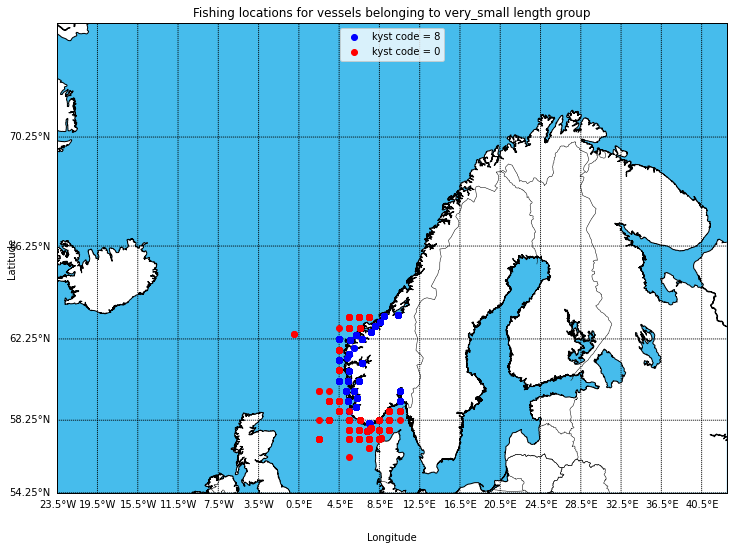

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m2 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m2.drawcoastlines()
m2.drawcountries()
m2.drawstates()
m2.drawmapboundary(fill_color='#46bcec')
m2.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_kyst_8, lats_kyst_8 = m2(lon_kyst_8, lat_kyst_8)
lons_kyst_0, lats_kyst_0 = m2(lon_kyst_0, lat_kyst_0)

# plot points as blue dots - kyst = 8
m2.scatter(lons_kyst_8, lats_kyst_8, marker = 'o', color='b', zorder=5, label = 'kyst code = 8')
# plot points as red dots - kyst = 0
m2.scatter(lons_kyst_0,lats_kyst_0, marker = 'o', color='r', zorder=5, label = 'kyst code = 0')

plt.legend()
plt.title("Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m2.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m2.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

## we will create an extra feature of haversine distance based on latitude and longitude

In [ ]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [ ]:
df_model_torsk['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df_model_torsk['Lat (lokasjon)'], df_model_torsk['Lon (lokasjon)'])]
df_model_torsk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt,harvesine_distance
34,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,3,15.0,6651.583162
45,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,15.0,6651.583162
51,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,15.0,6651.583162
85,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,210.0,276208,11,12.5,6651.583162
89,8.50,21.0,1095,1022,80920,8.0,10.50000,59.2500,100.0,33011,5,12.0,6651.583162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678519,8.70,20.0,63971,102202,80726,8.0,10.33143,63.3436,211.0,1531404,2,49.0,7095.235174
21678561,8.70,20.0,63971,102202,80726,8.0,10.33143,63.3436,211.0,1531404,1,62.0,7095.235174
21678589,5.98,42.0,5013,102202,80726,8.0,10.33143,63.3436,211.0,1531404,12,55.0,7095.235174
21678596,5.98,42.0,5013,102202,80726,8.0,10.33143,63.3436,211.0,1531404,12,52.0,7095.235174


In [ ]:
df_model_torsk = df_model_torsk[['Største lengde', 'Redskap (kode)', 'Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)', 'Lon (lokasjon)', 'Lat (lokasjon)', 'harvesine_distance', 'Produkttilstand (kode)', 'month', 'Produktvekt']]
df_model_torsk

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
34,8.50,21.0,1022,80920,8.0,10.50000,59.2500,6651.583162,210.0,3,15.0
45,8.50,21.0,1022,80920,8.0,10.50000,59.2500,6651.583162,210.0,11,15.0
51,8.50,21.0,1022,80920,8.0,10.50000,59.2500,6651.583162,210.0,11,15.0
85,8.50,21.0,1022,80920,8.0,10.50000,59.2500,6651.583162,210.0,11,12.5
89,8.50,21.0,1022,80920,8.0,10.50000,59.2500,6651.583162,100.0,5,12.0
...,...,...,...,...,...,...,...,...,...,...,...
21678519,8.70,20.0,102202,80726,8.0,10.33143,63.3436,7095.235174,211.0,2,49.0
21678561,8.70,20.0,102202,80726,8.0,10.33143,63.3436,7095.235174,211.0,1,62.0
21678589,5.98,42.0,102202,80726,8.0,10.33143,63.3436,7095.235174,211.0,12,55.0
21678596,5.98,42.0,102202,80726,8.0,10.33143,63.3436,7095.235174,211.0,12,52.0


In [ ]:
df_model_torsk['Fangstfelt (kode)'].value_counts()

80707    38259
80916    20039
80912    19663
80733    17776
82804    12294
         ...  
00802        1
00914        1
80936        1
00852        1
00814        1
Name: Fangstfelt (kode), Length: 85, dtype: int64

In [ ]:
df_location_productvekt = df_model_torsk.groupby(['Fangstfelt (kode)'])['Produktvekt'].agg('sum').rename_axis('area_code').reset_index(name='total_productvekt')

In [ ]:
df_location_productvekt

,area_code,total_productvekt
0,00706,2691.00
1,00707,10326.80
2,00715,24.00
3,00718,96.00
4,00719,11747.50
...,...,...
80,82837,946.00
81,82838,15.00
82,82839,7683.50
83,82840,217734.81


In [ ]:
list_locations = df_location_productvekt['area_code'].to_list()
list_locations

['00706',
 '00707',
 '00715',
 '00718',
 '00719',
 '00731',
 '00801',
 '00802',
 '00803',
 '00807',
 '00808',
 '00809',
 '00812',
 '00813',
 '00814',
 '00817',
 '00852',
 '00855',
 '00856',
 '00906',
 '00908',
 '00909',
 '00912',
 '00913',
 '00914',
 '00916',
 '00917',
 '00925',
 '00929',
 '00930',
 '02802',
 '02804',
 '03003',
 '04155',
 '04167',
 '04172',
 '04175',
 '04176',
 '04177',
 '04193',
 '80705',
 '80706',
 '80707',
 '80719',
 '80726',
 '80728',
 '80729',
 '80730',
 '80731',
 '80732',
 '80733',
 '80734',
 '80735',
 '80801',
 '80802',
 '80803',
 '80815',
 '80816',
 '80817',
 '80818',
 '80819',
 '80820',
 '80821',
 '80856',
 '80908',
 '80912',
 '80913',
 '80916',
 '80917',
 '80920',
 '80922',
 '80924',
 '80925',
 '80930',
 '80936',
 '82801',
 '82802',
 '82803',
 '82804',
 '82836',
 '82837',
 '82838',
 '82839',
 '82840',
 '82841']

In [ ]:
location_latitude_dict = df_model_torsk.set_index('Fangstfelt (kode)').to_dict()['Lat (lokasjon)']
location_latitude_dict

{'00706': 62.75,
 '00707': 63.243590000000005,
 '00715': 62.75,
 '00718': 63.25,
 '00719': 63.25,
 '00731': 62.765330000000006,
 '00801': 58.25,
 '00802': 58.72558000000001,
 '00803': 59.25,
 '00807': 57.75,
 '00808': 57.75,
 '00809': 58.25,
 '00812': 58.75,
 '00813': 59.25,
 '00814': 59.75,
 '00817': 58.25116,
 '00852': 58.25,
 '00855': 59.75,
 '00856': 57.67004,
 '00906': 57.25,
 '00908': 57.75,
 '00909': 57.75,
 '00912': 58.265840000000004,
 '00913': 58.25,
 '00914': 58.25,
 '00916': 58.75,
 '00917': 58.75,
 '00925': 57.75,
 '00929': 57.306180000000005,
 '00930': 57.81892,
 '02802': 60.76585,
 '02804': 61.75,
 '03003': 62.5,
 '04155': 56.25,
 '04167': 56.75,
 '04172': 57.25,
 '04175': 57.25,
 '04176': 57.25,
 '04177': 57.25,
 '04193': 57.24889,
 '80705': 62.25,
 '80706': 62.75,
 '80707': 63.243590000000005,
 '80719': 63.25,
 '80726': 63.3436,
 '80728': 63.31354,
 '80729': 63.00278,
 '80730': 62.8368,
 '80731': 62.765330000000006,
 '80732': 62.58036,
 '80733': 62.218109999999996,
 '8

In [ ]:
location_longitude_dict = df_model_torsk.set_index('Fangstfelt (kode)').to_dict()['Lon (lokasjon)']
location_longitude_dict

{'00706': 5.5,
 '00707': 7.49065,
 '00715': 4.5,
 '00718': 5.5,
 '00719': 6.5,
 '00731': 6.5624,
 '00801': 5.5,
 '00802': 5.43607,
 '00803': 4.5,
 '00807': 5.5,
 '00808': 6.5,
 '00809': 3.5,
 '00812': 4.5,
 '00813': 3.5,
 '00814': 3.5,
 '00817': 6.56095,
 '00852': 2.5,
 '00855': 2.5,
 '00856': 7.3025,
 '00906': 8.5,
 '00908': 8.5,
 '00909': 9.5,
 '00912': 8.49357,
 '00913': 9.5,
 '00914': 10.5,
 '00916': 9.5,
 '00917': 10.5,
 '00925': 7.5,
 '00929': 8.630510000000001,
 '00930': 7.67022,
 '02802': 4.519880000000001,
 '02804': 4.5,
 '03003': 0.0,
 '04155': 5.5,
 '04167': 7.5,
 '04172': 2.5,
 '04175': 5.5,
 '04176': 6.5,
 '04177': 7.5,
 '04193': 7.49777,
 '80705': 4.5,
 '80706': 5.5,
 '80707': 7.49065,
 '80719': 6.5,
 '80726': 10.331430000000001,
 '80728': 8.9273,
 '80729': 8.59176,
 '80730': 8.03486,
 '80731': 6.5624,
 '80732': 7.656789999999999,
 '80733': 5.597519999999999,
 '80734': 6.21667,
 '80735': 6.777,
 '80801': 5.5,
 '80802': 5.43607,
 '80803': 4.5,
 '80815': 5.22302,
 '80816': 

In [ ]:
list_freq_occurence_location = []
list_latitude = []
list_longitude = []
for i in list_locations:
  list_freq_occurence_location.append(len(df_model_torsk[df_model_torsk['Fangstfelt (kode)'] == i]))
  
for i in list_locations:
  list_latitude.append(location_latitude_dict[i])

for i in list_locations:
  list_longitude.append(location_longitude_dict[i])

In [ ]:
print(len(list_freq_occurence_location))
print(len(list_latitude))
print(len(list_longitude))

85
85
85


In [ ]:
df_location_productvekt['freq_occurence_location'] = list_freq_occurence_location
df_location_productvekt['latitude'] = list_latitude
df_location_productvekt['longitude'] = list_longitude

In [ ]:
df_location_productvekt

,area_code,total_productvekt,freq_occurence_location,latitude,longitude
0,00706,2691.00,23,62.75000,5.50000
1,00707,10326.80,189,63.24359,7.49065
2,00715,24.00,1,62.75000,4.50000
3,00718,96.00,4,63.25000,5.50000
4,00719,11747.50,216,63.25000,6.50000
...,...,...,...,...,...
80,82837,946.00,25,61.53710,5.51210
81,82838,15.00,1,61.33540,5.26468
82,82839,7683.50,228,61.11448,6.78870
83,82840,217734.81,3553,60.70822,5.52325


In [ ]:
import plotly.express as px

fig = px.density_mapbox(df_location_productvekt, lat='latitude', lon='longitude', z='total_productvekt', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

## length vs product weight

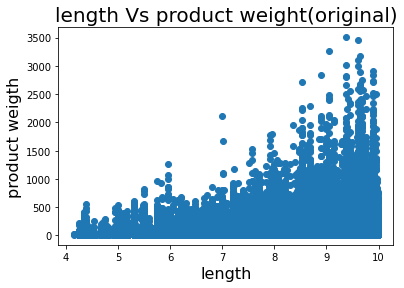

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

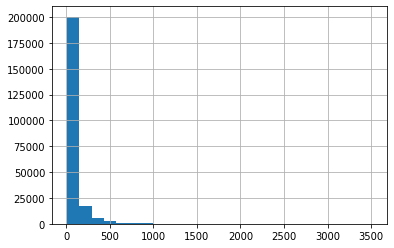

In [ ]:
target_distribution =  df_model_torsk['Produktvekt'].hist(bins=25)

AS we see the range of targets is quite high hence we try to normalize it using logarithm function

In [ ]:
df_model_torsk['Produktvekt'].describe()

count    228723.000000
mean         75.831190
std         133.996155
min          10.100000
25%          17.000000
50%          31.500000
75%          77.000000
max        3507.000000
Name: Produktvekt, dtype: float64

In [ ]:
import numpy as np
np.log(df_model_torsk['Produktvekt'].min())

2.312535423847214

In [ ]:
df_model_torsk[df_model_torsk['Produktvekt'] == df_model_torsk['Produktvekt'].min()]

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
9337474,9.30,22.0,1022,82841,8.0,5.38093,60.22739,6713.029848,211.0,6,10.1
13065559,8.00,33.0,1022,82803,8.0,4.47778,61.26170,6822.648789,211.0,4,10.1
17320726,7.00,22.0,1022,80817,8.0,6.56095,58.25116,6503.019981,210.0,1,10.1
20165488,8.90,22.0,1022,80815,8.0,5.22302,59.73966,6658.169568,211.0,3,10.1
21103540,7.59,22.0,1022,80815,8.0,5.22302,59.73966,6658.169568,211.0,4,10.1


In [ ]:
df_model_torsk['Produktvekt']  = np.log(df_model_torsk['Produktvekt'])/df_model_torsk['Største lengde'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
34,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,3,0.318594
45,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.318594
51,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.318594
85,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.297145
89,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,5,0.292342
114,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,10,0.407734
115,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,10,0.360947
132,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,12,0.411354
156,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,12,0.363652
164,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,11,0.326187


Now the distribution of targets is quite small range

In [ ]:
df_model_torsk['Produktvekt'].describe()

count    228723.000000
mean          0.441883
std           0.136424
min           0.233876
25%           0.335798
50%           0.413819
75%           0.522880
max           1.442661
Name: Produktvekt, dtype: float64

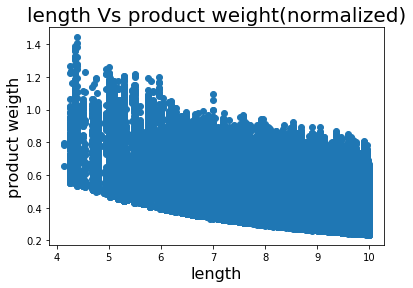

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(normalized)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

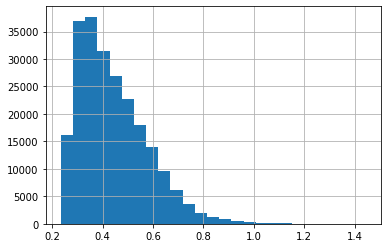

In [ ]:
transformed_target_distribution =  df_model_torsk['Produktvekt'].hist(bins=25)

In [ ]:
# df_model_torsk = df_model_torsk.reset_index()
# df_model_torsk = df_model_torsk.drop(['index'], axis = 1)

In [ ]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
34,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,3,0.318594
45,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.318594
51,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.318594
85,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,11,0.297145
89,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,5,0.292342
114,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,10,0.407734
115,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,10,0.360947
132,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,12,0.411354
156,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,210.0,12,0.363652
164,8.5,21.0,1022,80920,8.0,10.5,59.25,6651.583162,100.0,11,0.326187


In [ ]:
df_model_torsk['Største lengde'].mean()

8.485068663842124

In [ ]:
df_model_torsk.dtypes

Største lengde            float64
Redskap (kode)            float64
Art - FDIR (kode)          object
Fangstfelt (kode)          object
Kyst/hav (kode)           float64
Lon (lokasjon)            float64
Lat (lokasjon)            float64
harvesine_distance        float64
Produkttilstand (kode)    float64
month                       int64
Produktvekt               float64
dtype: object

In [ ]:
# df_model_torsk[df_model_torsk['Produktvekt'] == 0]

## defining X(independent variables) and y(dependent variable - log(productvekt)/vessel length)

In [ ]:
X = df_model_torsk[['Største lengde','Redskap (kode)', 'Art - FDIR (kode)', 'Kyst/hav (kode)','Lon (lokasjon)','Lat (lokasjon)', 'harvesine_distance', 'Produkttilstand (kode)','month']]
y = df_model_torsk[['Produktvekt']]

In [ ]:
print(X.shape)
print(y.shape)

(228723, 9)
(228723, 1)


## dividing into train/validation and test sets. first divide into test and train and then divide train into train and validation. we use stratify parameter to ensure that the species code have been divided proportionaltely into the train , validation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = X['Art - FDIR (kode)'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify = X_train['Art - FDIR (kode)']) # 0.25 x 0.8 = 0.2

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(137233, 9)
(45745, 9)
(45745, 9)
(137233, 1)
(45745, 1)
(45745, 1)


In [ ]:
# y_test[y_test['Produktvekt'] == 0]

In [ ]:
X_train['Art - FDIR (kode)'].value_counts()

1022      105123
102202     32110
Name: Art - FDIR (kode), dtype: int64

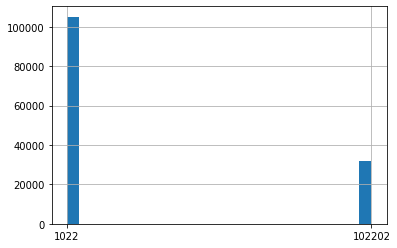

In [ ]:
X_train['Art - FDIR (kode)'].hist(bins=25)

In [ ]:
X_val['Art - FDIR (kode)'].value_counts()

1022      35042
102202    10703
Name: Art - FDIR (kode), dtype: int64

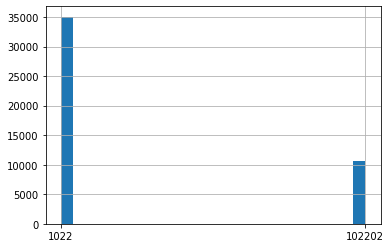

In [ ]:
X_val['Art - FDIR (kode)'].hist(bins=25)

In [ ]:
X_test['Art - FDIR (kode)'].value_counts()

1022      35042
102202    10703
Name: Art - FDIR (kode), dtype: int64

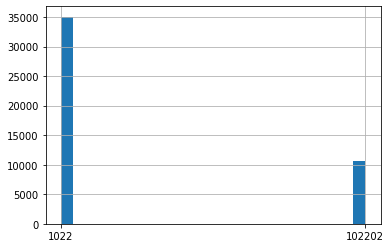

In [ ]:
X_test['Art - FDIR (kode)'].hist(bins=25)

## before fitting train data to the model we need one hot encode the species code as it is not a numeric but string

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Art - FDIR (kode)'])

In [ ]:
X_val = pd.get_dummies(X_val, columns=['Art - FDIR (kode)'])

In [ ]:
X_test = pd.get_dummies(X_test, columns=['Art - FDIR (kode)'])

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(137233, 10)
(45745, 10)
(45745, 10)


In [ ]:
# X_train.columns = ['length']
X_train = X_train.rename({'Største lengde': 'length'}, axis=1)

In [ ]:
# X_train.columns = ['length']
X_val = X_val.rename({'Største lengde': 'length'}, axis=1)

In [ ]:
# X_train.columns = ['length']
X_test = X_test.rename({'Største lengde': 'length'}, axis=1)

## just overview

In [ ]:
X_train.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202
7073050,7.25,20.0,8.0,4.50056,60.24815,6710.511604,211.0,11,1,0
4145986,8.16,22.0,8.0,4.50000,61.75000,6876.834807,211.0,4,1,0
10474724,8.75,20.0,8.0,4.50056,60.24815,6710.511604,211.0,6,1,0
11013898,9.76,61.0,8.0,4.50000,61.75000,6876.834807,210.0,1,1,0
6751940,7.60,22.0,8.0,8.49357,58.26584,6521.988693,210.0,3,1,0
3571851,9.82,20.0,8.0,5.59752,62.21811,6934.332552,110.0,3,1,0
193581,5.40,31.0,8.0,7.49065,63.24359,7059.748712,211.0,7,0,1
16285847,8.91,22.0,8.0,9.50000,58.75000,6585.589449,210.0,5,1,0
3533741,7.85,22.0,8.0,5.22302,59.73966,6658.169568,100.0,2,1,0
15392866,7.89,22.0,8.0,9.50000,58.75000,6585.589449,210.0,12,1,0


In [ ]:
y_train.head(10)

,Produktvekt
7073050,0.538203
4145986,0.354212
10474724,0.594744
11013898,0.569742
6751940,0.356322
3571851,0.497230
193581,0.572415
16285847,0.336221
3533741,0.661523
15392866,0.376478


In [ ]:
X_val.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202
5522802,9.70,22.0,8.0,9.50000,58.75000,6585.589449,210.0,1,1,0
12614932,5.00,41.0,8.0,7.49065,63.24359,7059.748712,100.0,10,0,1
636691,8.47,61.0,8.0,4.50000,61.75000,6876.834807,210.0,8,1,0
15618565,9.80,22.0,8.0,7.49065,63.24359,7059.748712,100.0,6,0,1
7128880,8.60,20.0,8.0,5.50000,62.75000,6992.578813,211.0,6,1,0
203832,8.62,20.0,8.0,6.56240,62.76533,7000.652584,211.0,3,1,0
6865925,9.69,33.0,0.0,7.50000,57.25000,6400.906556,210.0,3,1,0
1951030,8.40,22.0,8.0,9.50000,58.75000,6585.589449,100.0,1,1,0
653125,9.10,20.0,8.0,4.50000,61.75000,6876.834807,211.0,6,1,0
7100589,7.60,41.0,8.0,7.49065,63.24359,7059.748712,100.0,8,0,1


In [ ]:
y_val.head(10)

,Produktvekt
5522802,0.282561
12614932,1.151148
636691,0.618234
15618565,0.324291
7128880,0.374288
203832,0.328679
6865925,0.264701
1951030,0.453174
653125,0.349237
7100589,0.491799


In [ ]:
index_val = X_val.index
index_val

Int64Index([ 5522802, 12614932,   636691, 15618565,  7128880,   203832,
             6865925,  1951030,   653125,  7100589,
            ...
             2186208, 12378142,  1355328,  4389680,   197367, 20217165,
             6852726,   254020, 13284457, 10540051],
           dtype='int64', length=45745)

In [ ]:
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202
21149911,7.71,20.0,8.0,5.50000,62.75000,6992.578813,110.0,2,1,0
17480817,7.89,22.0,8.0,9.50000,58.75000,6585.589449,210.0,3,1,0
8260940,9.73,22.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1
258029,7.53,22.0,8.0,7.49065,63.24359,7059.748712,211.0,1,0,1
16350264,8.60,22.0,8.0,8.49357,58.26584,6521.988693,210.0,11,1,0
3555086,9.45,33.0,8.0,6.50000,63.25000,7053.704686,211.0,3,1,0
15621319,7.22,41.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1
668406,9.48,22.0,8.0,4.50000,61.75000,6876.834807,211.0,2,1,0
5976036,8.85,20.0,8.0,5.50000,62.75000,6992.578813,110.0,3,1,0
1306202,8.62,20.0,8.0,6.56240,62.76533,7000.652584,211.0,4,1,0


In [ ]:
y_test.head(10)

,Produktvekt
21149911,0.822126
17480817,0.314944
8260940,0.502218
258029,0.383848
16350264,0.428939
3555086,0.317009
15621319,0.571625
668406,0.252943
5976036,0.629191
1306202,0.446653


In [ ]:
index_test = X_test.index
index_test

Int64Index([21149911, 17480817,  8260940,   258029, 16350264,  3555086,
            15621319,   668406,  5976036,  1306202,
            ...
             2393376, 18726240,  9360099,  4154265, 14672394, 16668632,
            17745758, 11589736, 19278158,  1310590],
           dtype='int64', length=45745)

In [ ]:
! nvidia-smi

Sun Jul  4 19:10:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !git clone --recursive https://github.com/microsoft/LightGBM
# !cd LightGBM
# !mkdir build
# !cd build
# !cmake -A x64 -DUSE_GPU=1 
# # if you have installed NVIDIA CUDA to a customized location, you should specify paths to OpenCL headers and library like the following:
# # cmake -A x64 -DUSE_GPU=1 -DBOOST_ROOT=C:/local/boost_1_63_0 -DBOOST_LIBRARYDIR=C:/local/boost_1_63_0/lib64-msvc-14.0 -DOpenCL_LIBRARY="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v10.0/lib/x64/OpenCL.lib" -DOpenCL_INCLUDE_DIR="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v10.0/include" ..
# !cmake --build . --target ALL_BUILD --config Release

##  creating and fitting train data to the model - LightGBM regressor

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle


In [ ]:
# !git clone --recursive https://github.com/Microsoft/LightGBM
# %cd LightGBM
# !mkdir build
# %cd build
# !cmake -A x64 -DUSE_GPU=1 
# !make -j4

In [ ]:
# %cd /content/LightGBM/python-package
# !python3 setup.py install --gpu

In [ ]:
# !pip install cmake

In [ ]:
# !pip install lightgbm --install-option=--gpu

In [ ]:
# pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

In [ ]:
# After running
! git clone --recursive https://github.com/Microsoft/LightGBM

#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

fatal: destination path 'LightGBM' already exists and is not an empty directory.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory:

## default parameters
## LightGBM default: MSE

In [ ]:
# gbm = lightgbm.LGBMRegressor(random_state=33,device ='gpu')
                            
# gbm.fit(X_train,y_train)




# # gbm = lightgbm.LGBMRegressor(random_state=33)
                            
# # gbm.fit(X_train,y_train)

## LightGBM default: MSE + early stopping

In [ ]:
# gbm2 = lightgbm.LGBMRegressor(objective = 'regression',
#                        n_estimators = 10000,
#                         early_stopping_rounds = 10,
# #                       max_depth = 9,
# #                       verbose = True,
#                        learning_rate = 0.01,
#                       device ='gpu',
#                       gpu_platform_id = 0,
#                         gpu_device_id = 0)
# # Fitting the model
# gbm2.fit(X_train, y_train, eval_set=[(X_val, y_val)],
#     eval_metric='l2',  # also the default
#     verbose=False,)


## Assymetric Custom Loss

## We don't want our model to overpredict, but we are fine with underpredictions. The reason is that if we overpredict catch and it does not happen that way then the organization could suffer a loss however if we underpredict and it does not happen that way, even then the organozation could make profit so no problem in underestimating.

## We can make a custom loss which gives 10 times more penalty when the true targets are less than predictions as compared to when true targets are more

## residual = y_true(actual_catch) - y_pred(predicted_catch). when residual<0: penalise 5 times more else normal.

In [ ]:
def custom_asymmetric_objective(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -2*1.02*residual, -2*residual)
    hess = np.where(residual<0, 2*1.02, 2.0)
    return grad, hess

def custom_asymmetric_eval(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*1.02, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

## Exploring our custom loss function with some plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


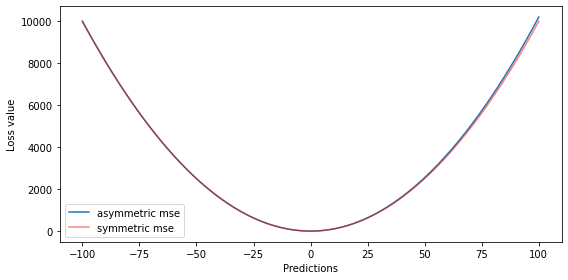

In [ ]:
# let's see how our custom loss function looks with respect to different prediction values
import seaborn as sns
import numpy as np

y_true = np.repeat(0,1000)
y_pred = np.linspace(-100,100,1000)
residual = (y_true - y_pred).astype("float")

custom_loss = np.where(residual < 0, (residual**2)*1.02, residual**2) 

fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(y_pred, custom_loss, alpha=1, label="asymmetric mse")
sns.lineplot(y_pred, residual**2, alpha = 0.5, label = "symmetric mse", color="red")
ax.set_xlabel("Predictions")
ax.set_ylabel("Loss value")

fig.tight_layout()

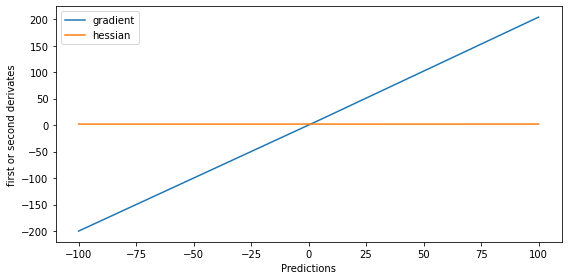

In [ ]:
grad, hess = custom_asymmetric_objective(y_true, y_pred)

fig, ax = plt.subplots(1,1, figsize=(8,4))

# ax.plot(y_hat, errors)
ax.plot(y_pred, grad)
ax.plot(y_pred, hess)
ax.legend(('gradient', 'hessian'))
ax.set_xlabel('Predictions')
ax.set_ylabel('first or second derivates')

fig.tight_layout()


## LightGBM custom objective

In [ ]:
# # make new model on new value
# gbm3 = lightgbm.LGBMRegressor(random_state=33,device ='gpu',
#                       gpu_platform_id = 0,
#                         gpu_device_id = 0)
# gbm3.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

# gbm3.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric='l2',
#     verbose=False,
# )

## LightGBM_early_boosting custom eval_metric

In [ ]:
# # make new model on new value
# gbm4 = lightgbm.LGBMRegressor(random_state=33,
#                               early_stopping_rounds = 10,
#                               n_estimators=10000, 
#                               device ='gpu',
#                           gpu_platform_id = 0,
#                             gpu_device_id = 0)
                             

# gbm4.set_params(**{'objective': "regression"}, metrics = ["mse", 'mae'])

# gbm4.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric=custom_asymmetric_eval,
#     verbose=False,
# )

## LightGBM_early_boosting custom objective

In [ ]:
# # make new model on new value
# gbm5 = lightgbm.LGBMRegressor(random_state=33,
#                               early_stopping_rounds = 10,
#                               n_estimators=10000,
#                               device ='gpu',
#                           gpu_platform_id = 0,
#                             gpu_device_id = 0)
                             

# gbm5.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

# gbm5.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric="l2",
#     verbose=False,
# )

## LightGBM_early_boosting custom eval_metric + objective

In [ ]:
# make new model on new value
gbm6 = lightgbm.LGBMRegressor(random_state=33,
                              early_stopping_rounds = 10,
                              n_estimators=10000,
                              device ='gpu',
                          gpu_platform_id = 0,
                            gpu_device_id = 0)
                             

gbm6.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

gbm6.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=custom_asymmetric_eval,
    verbose=False,
)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:158: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', early_stopping_rounds=10, gpu_device_id=0,
              gpu_platform_id=0, importance_type='split', learning_rate=0.1,
              max_depth=-1, metrics=['mse', 'mae'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=31,
              objective=<function custom_asymmetric_objective at 0x7fc954db4320>,
              random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Reporting scores for different models

### Scores table

In [ ]:
# 367482367482# asymmetric mse scores
# # _,loss_rf,_ = custom_asymmetric_eval(y_test, rf.predict(X_test))
# y_pred_gbm = gbm.predict(X_test).reshape(45745 ,1)
# y_pred_gbm2 = gbm2.predict(X_test).reshape(45745 ,1)
# y_pred_gbm3 = gbm3.predict(X_test).reshape(45745 ,1)
# y_pred_gbm4 = gbm4.predict(X_test).reshape(45745 ,1)
# y_pred_gbm5 = gbm5.predict(X_test).reshape(45745 ,1)
# y_pred_gbm6 = gbm6.predict(X_test).reshape(45745 ,1)
# _,loss_gbm,_ = custom_asymmetric_eval(y_test, y_pred_gbm)
# _,loss_gbm2,_ = custom_asymmetric_eval(y_test, y_pred_gbm2)
# _,loss_gbm3,_ = custom_asymmetric_eval(y_test, y_pred_gbm3)
# _,loss_gbm4,_ = custom_asymmetric_eval(y_test, y_pred_gbm4)
# _,loss_gbm5,_ = custom_asymmetric_eval(y_test, y_pred_gbm5)
# _,loss_gbm6,_ = custom_asymmetric_eval(y_test, y_pred_gbm6)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# 1417982

In [ ]:
# score_dict = {'LightGBM default - gbm' : 
#               {'asymmetric custom mse (test)': loss_gbm,
#               'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm.predict(X_train).reshape(137233,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm.predict(X_test)), 
#                '# boosting rounds' : gbm.booster_.current_iteration()},
              
#               'LightGBM with early stopping - gbm2' : 
#               {'asymmetric custom mse (test)': loss_gbm2,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm2.predict(X_train).reshape(137233,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm2.predict(X_test)),
#                '# boosting rounds' : gbm2.booster_.current_iteration()},
              
#               'LightGBM with custom training loss (no hyperparameter tuning) - gbm3': 
#               {'asymmetric custom mse (test)': loss_gbm3,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm3.predict(X_train).reshape(137233,1))[1],               
#                'symmetric mse': mean_squared_error(y_test, gbm3.predict(X_test)),
#                '# boosting rounds' : gbm3.booster_.current_iteration()},
              
#              'LightGBM with early_stopping and custom validation loss - gbm4': 
#               {'asymmetric custom mse (test)': loss_gbm4,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm4.predict(X_train).reshape(137233,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm4.predict(X_test)),
#                '# boosting rounds' : gbm4.booster_.current_iteration()},
              
#               'LightGBM with early_stopping and custom training loss - gbm5': 
#               {'asymmetric custom mse (test)': loss_gbm5,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm5.predict(X_train).reshape(137233,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm5.predict(X_test)),
#                '# boosting rounds' : gbm5.booster_.current_iteration()}, 
              
#               'LightGBM with early_stopping, custom training and custom validation loss - gbm6': 
#               {'asymmetric custom mse (test)': loss_gbm6,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm6.predict(X_train).reshape(137233,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm6.predict(X_test)),
#                '# boosting rounds' : gbm6.booster_.current_iteration()}
             
#              }

In [ ]:
# df_score = pd.DataFrame(score_dict).T
# df_score

In [ ]:
# algorithm = ['LightGBM', 'LightGBM', 'LightGBM', 'LightGBM','LightGBM', 'LightGBM']
# training_loss = ['default mse','default mse', 'aymmetric mse', 'default mse', 'aymmetric mse', 'aymmetric mse']
# hyperparamters_tuned = ['none','boosting rounds','none','boosting rounds','boosting rounds','boosting rounds']
# validation_loss = ['default mse','default mse','default mse', 'asymmetric mse', 'default mse', 'asymmetric mse']

# df_score['Algorithm'] = algorithm
# df_score['Training_loss'] = training_loss
# df_score['Hyperparamters_tuned'] = hyperparamters_tuned
# df_score['Validation_loss'] = validation_loss

In [ ]:
# df_score

In [ ]:
# cols = df_score.columns.tolist()
# cols

In [ ]:
# df_score[['Algorithm','Training_loss', 'Hyperparamters_tuned', 'Validation_loss', '# boosting rounds','asymmetric custom mse (test)', 'asymmetric custom mse (train)', 'symmetric mse']]

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax1, ax2 = ax.flatten()

# # ax1.plot(rf.predict(X_test), y_test, 'o', color='#1c9099')
# # ax1.set_xlabel('Predictions')
# # ax1.set_ylabel('Actuals')
# # ax1.set_title('Random Forest')  

# ax1.plot(gbm.predict(X_test), y_test, 'o', color='#1c9099')
# ax1.set_xlabel('Predictions')
# ax1.set_ylabel('Actuals')
# ax1.set_title('LightGBM default') 

# ax2.plot(gbm2.predict(X_test), y_test, 'o', color='#1c9099')
# ax2.set_xlabel('Predictions')
# ax2.set_ylabel('Actuals')
# ax2.set_title('gbm2') 

# # ax3.plot(gbm3.predict(X_test), y_test, 'o', color='#1c9099')
# # ax3.set_xlabel('Predictions')
# # ax3.set_ylabel('Actuals')
# # ax3.set_title('gbm3') 

# # ax4.plot(gbm4.predict(X_test), y_test, 'o', color='#1c9099')
# # ax4.set_xlabel('Predictions')
# # ax4.set_ylabel('Actuals')
# # ax4.set_title('gbm4') 

# # ax5.plot(gbm5.predict(X_test), y_test, 'o', color='#1c9099')
# # ax5.set_xlabel('Predictions')
# # ax5.set_ylabel('Actuals')
# # ax5.set_title('gbm5') 

# # ax6.plot(gbm6.predict(X_test), y_test, 'o', color='#1c9099')
# # ax6.set_xlabel('Predictions')
# # ax6.set_ylabel('Actuals')
# # ax6.set_title('gbm6 - LightGBM with early_stopping, \n custom objective and custom evalution') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()


In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax3, ax4 = ax.flatten()

# ax3.plot(gbm3.predict(X_test), y_test, 'o', color='#1c9099')
# ax3.set_xlabel('Predictions')
# ax3.set_ylabel('Actuals')
# ax3.set_title('gbm3') 

# ax4.plot(gbm4.predict(X_test), y_test, 'o', color='#1c9099')
# ax4.set_xlabel('Predictions')
# ax4.set_ylabel('Actuals')
# ax4.set_title('gbm4') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()


In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax5, ax6 = ax.flatten()


# ax5.plot(gbm5.predict(X_test), y_test, 'o', color='#1c9099')
# ax5.set_xlabel('Predictions')
# ax5.set_ylabel('Actuals')
# ax5.set_title('gbm5') 

# ax6.plot(gbm6.predict(X_test), y_test, 'o', color='#1c9099')
# ax6.set_xlabel('Predictions')
# ax6.set_ylabel('Actuals')
# ax6.set_title('gbm6 - LightGBM with early_stopping, \n custom objective and custom evalution') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()

## MAE - Test set

In [ ]:
# print(mean_absolute_error(y_test, gbm.predict(X_test)))
# print(mean_absolute_error(y_test, gbm2.predict(X_test)))
# print(mean_absolute_error(y_test, gbm3.predict(X_test)))
# print(mean_absolute_error(y_test, gbm4.predict(X_test)))
# print(mean_absolute_error(y_test, gbm5.predict(X_test)))
# print(mean_absolute_error(y_test, gbm6.predict(X_test)))
# # print(mean_absolute_error(y_test, gbm4.predict(X_test)))

## MAE - Validation set

In [ ]:
# print(mean_absolute_error(y_val, gbm.predict(X_val)))
# print(mean_absolute_error(y_val, gbm2.predict(X_val)))
# print(mean_absolute_error(y_val, gbm3.predict(X_val)))
# print(mean_absolute_error(y_val, gbm4.predict(X_val)))
# print(mean_absolute_error(y_val, gbm5.predict(X_val)))
# print(mean_absolute_error(y_val, gbm6.predict(X_val)))

## Error analysis for validation set

In [ ]:
# len_val = X_val['length'].values

In [ ]:
# y_val.values

In [ ]:
# y_pred_val = gbm4.predict(X_val)
# y_pred_val

In [ ]:
# df_val_error = pd.DataFrame()
  
# # append columns to an empty DataFrame

# df_val_error['len_val'] = len_val
# df_val_error['y_val'] = y_val.values
# df_val_error['y_pred_val'] = y_pred_val
# df_val_error.index = index_val
  
# df_val_error.head(10)

In [ ]:
# df_val_error['absolute_error'] = abs(df_val_error['y_pred_val'] - df_val_error['y_val'])

In [ ]:
# df_val_error.head(20)

In [ ]:
# plt.scatter(df_val_error['len_val'], df_val_error['absolute_error'])
# plt.title("length Vs abs error for validation set", fontsize = 20)
# plt.xlabel('length', fontsize=16)
# plt.ylabel('abs error', fontsize=16)
# plt.show()

## Error analysis for test set

In [ ]:
len_test = X_test['length'].values

In [ ]:
y_pred_test = gbm6.predict(X_test)
y_pred_test

array([0.7460687 , 0.38353743, 0.42218341, ..., 0.54482221, 0.47721519,
       0.41212761])

In [ ]:
df_test_error = pd.DataFrame()
  
# append columns to an empty DataFrame

df_test_error['len_test'] = len_test
df_test_error['y_test'] = y_test.values
df_test_error['y_pred_test'] = y_pred_test
df_test_error.index = index_test
  
df_test_error.head(10)


,len_test,y_test,y_pred_test
21149911,7.71,0.822126,0.746069
17480817,7.89,0.314944,0.383537
8260940,9.73,0.502218,0.422183
258029,7.53,0.383848,0.490401
16350264,8.60,0.428939,0.350218
3555086,9.45,0.317009,0.381445
15621319,7.22,0.571625,0.519275
668406,9.48,0.252943,0.388638
5976036,8.85,0.629191,0.535508
1306202,8.62,0.446653,0.488655


In [ ]:
df_test_error['absolute_error'] = abs(df_test_error['y_pred_test'] - df_test_error['y_test'])

In [ ]:
df_test_error.head(15)

,len_test,y_test,y_pred_test,absolute_error
21149911,7.71,0.822126,0.746069,0.076058
17480817,7.89,0.314944,0.383537,0.068594
8260940,9.73,0.502218,0.422183,0.080035
258029,7.53,0.383848,0.490401,0.106553
16350264,8.60,0.428939,0.350218,0.078721
3555086,9.45,0.317009,0.381445,0.064436
15621319,7.22,0.571625,0.519275,0.052350
668406,9.48,0.252943,0.388638,0.135696
5976036,8.85,0.629191,0.535508,0.093684
1306202,8.62,0.446653,0.488655,0.042002


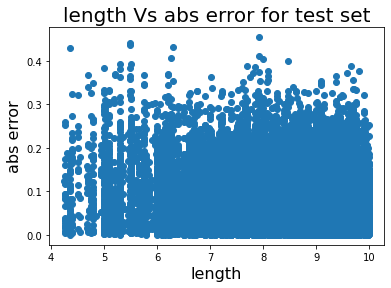

In [ ]:
plt.scatter(df_test_error['len_test'], df_test_error['absolute_error'])
plt.title("length Vs abs error for test set", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('abs error', fontsize=16)
plt.show()

In [ ]:
df_test_error['actual_catch'] = np.exp(df_test_error['y_test'] * df_test_error['len_test'])
df_test_error['predicted_catch'] = np.exp(df_test_error['y_pred_test'] * df_test_error['len_test'])

In [ ]:
df_test_error['actual_abs_error'] = abs(df_test_error['actual_catch'] - df_test_error['predicted_catch'])
df_test_error.head(10)

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error
21149911,7.71,0.822126,0.746069,0.076058,566.0,314.879391,251.120609
17480817,7.89,0.314944,0.383537,0.068594,12.0,20.616884,8.616884
8260940,9.73,0.502218,0.422183,0.080035,132.5,60.815495,71.684505
258029,7.53,0.383848,0.490401,0.106553,18.0,40.153818,22.153818
16350264,8.60,0.428939,0.350218,0.078721,40.0,20.325500,19.674500
3555086,9.45,0.317009,0.381445,0.064436,20.0,36.768939,16.768939
15621319,7.22,0.571625,0.519275,0.052350,62.0,42.485626,19.514374
668406,9.48,0.252943,0.388638,0.135696,11.0,39.816856,28.816856
5976036,8.85,0.629191,0.535508,0.093684,262.0,114.347711,147.652289
1306202,8.62,0.446653,0.488655,0.042002,47.0,67.505085,20.505085


MAE - 48.37 kg

Max error - 2793.1kg


In [ ]:
df_test_error['actual_abs_error'].describe()

count    45745.000000
mean        48.364723
std        111.784050
min          0.000039
25%          6.678223
50%         16.562864
75%         43.524337
max       2790.967195
Name: actual_abs_error, dtype: float64

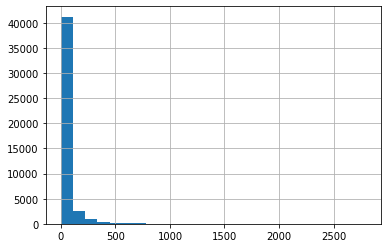

In [ ]:
df_test_error['actual_abs_error'].hist(bins=25)

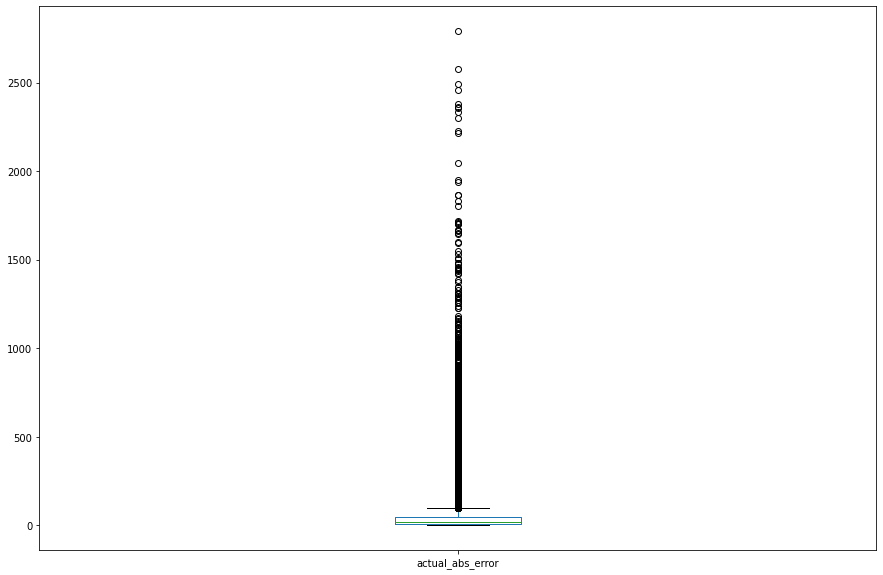

In [ ]:
df_test_error.boxplot(figsize=(15,10), column =['actual_abs_error'], grid = False)

we can see that out of 367482 entries , 16928 entries had error>500 and the rest had less than 500.

we need to examine these entries where the error is abnormally high

In [ ]:
df_test_high_error = df_test_error[df_test_error['actual_abs_error'] > 50]
df_test_high_error

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error
21149911,7.71,0.822126,0.746069,0.076058,566.0,314.879391,251.120609
8260940,9.73,0.502218,0.422183,0.080035,132.5,60.815495,71.684505
5976036,8.85,0.629191,0.535508,0.093684,262.0,114.347711,147.652289
5975721,9.45,0.366745,0.493836,0.127092,32.0,106.351747,74.351747
18109718,9.70,0.566295,0.467240,0.099055,243.0,92.965228,150.034772
...,...,...,...,...,...,...,...
2407509,8.63,0.532459,0.427419,0.105040,99.0,39.989892,59.010108
3562129,9.12,0.638167,0.543178,0.094989,337.0,141.709908,195.290092
15041948,9.50,0.508244,0.399131,0.109113,125.0,44.333506,80.666494
9390420,9.09,0.607421,0.456102,0.151320,250.0,63.178466,186.821534


In [ ]:
X_test_high_error = X_test[X_test.index.isin(df_test_high_error.index)]
X_test_high_error

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202
21149911,7.71,20.0,8.0,5.50000,62.75000,6992.578813,110.0,2,1,0
8260940,9.73,22.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1
5976036,8.85,20.0,8.0,5.50000,62.75000,6992.578813,110.0,3,1,0
5975721,9.45,20.0,8.0,6.21667,62.44167,6962.732688,110.0,3,1,0
18109718,9.70,61.0,8.0,4.50000,61.75000,6876.834807,211.0,6,1,0
...,...,...,...,...,...,...,...,...,...,...
2407509,8.63,61.0,8.0,7.49065,63.24359,7059.748712,211.0,2,0,1
3562129,9.12,20.0,8.0,7.65679,62.58036,6988.052508,211.0,3,1,0
15041948,9.50,22.0,8.0,4.50000,61.75000,6876.834807,211.0,3,1,0
9390420,9.09,20.0,8.0,6.21667,62.44167,6962.732688,110.0,8,1,0


In [ ]:
X_test_high_error['Redskap (kode)'].value_counts()

20.0    3705
22.0    3576
33.0    1029
61.0     808
41.0     773
32.0     188
42.0      46
31.0      20
55.0      16
50.0       6
57.0       5
34.0       4
Name: Redskap (kode), dtype: int64

In [ ]:
X_test_high_error['Produkttilstand (kode)'].value_counts()

211.0    3997
110.0    2620
210.0    2213
100.0    1327
641.0      16
642.0       2
630.0       1
Name: Produkttilstand (kode), dtype: int64

In [ ]:
X_test_high_error['Redskap (kode)'].value_counts()

20.0    3705
22.0    3576
33.0    1029
61.0     808
41.0     773
32.0     188
42.0      46
31.0      20
55.0      16
50.0       6
57.0       5
34.0       4
Name: Redskap (kode), dtype: int64

In [ ]:
X_test_high_error['Produkttilstand (kode)'].value_counts()

211.0    3997
110.0    2620
210.0    2213
100.0    1327
641.0      16
642.0       2
630.0       1
Name: Produkttilstand (kode), dtype: int64

locations for which error comes out tobe exceptionally high(error>500kg)

In [ ]:
lat = X_test_high_error['Lat (lokasjon)'].values
lon = X_test_high_error['Lon (lokasjon)'].values

In [ ]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

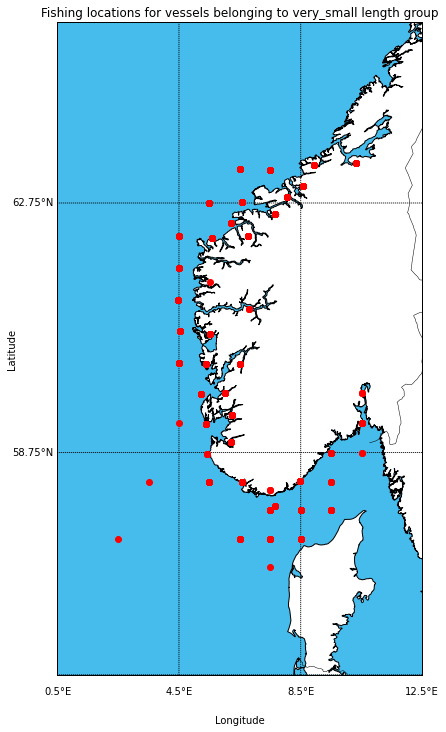

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m4 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m4.drawcoastlines()
m4.drawcountries()
m4.drawstates()
m4.drawmapboundary(fill_color='#46bcec')
m4.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m4(lon, lat)
# plot points as blue dots
m4.scatter(lons, lats, marker = 'o', color='r', zorder=5)
#plt.legend()
plt.title("Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m4.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m4.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

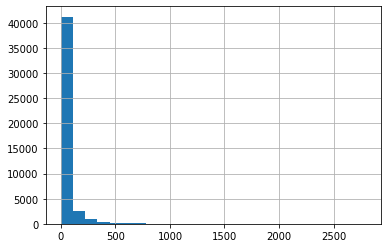

In [ ]:
df_test_error['actual_abs_error'].hist(bins=25)

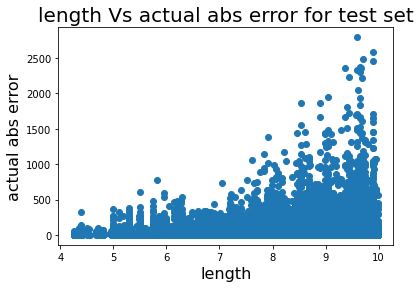

In [ ]:
plt.scatter(df_test_error['len_test'], df_test_error['actual_abs_error'])
plt.title("length Vs actual abs error for test set", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('actual abs error', fontsize=16)
plt.show()

In [ ]:
X_test['abs_error'] = df_test_error['actual_abs_error']
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202,abs_error
21149911,7.71,20.0,8.0,5.50000,62.75000,6992.578813,110.0,2,1,0,251.120609
17480817,7.89,22.0,8.0,9.50000,58.75000,6585.589449,210.0,3,1,0,8.616884
8260940,9.73,22.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1,71.684505
258029,7.53,22.0,8.0,7.49065,63.24359,7059.748712,211.0,1,0,1,22.153818
16350264,8.60,22.0,8.0,8.49357,58.26584,6521.988693,210.0,11,1,0,19.674500
3555086,9.45,33.0,8.0,6.50000,63.25000,7053.704686,211.0,3,1,0,16.768939
15621319,7.22,41.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1,19.514374
668406,9.48,22.0,8.0,4.50000,61.75000,6876.834807,211.0,2,1,0,28.816856
5976036,8.85,20.0,8.0,5.50000,62.75000,6992.578813,110.0,3,1,0,147.652289
1306202,8.62,20.0,8.0,6.56240,62.76533,7000.652584,211.0,4,1,0,20.505085


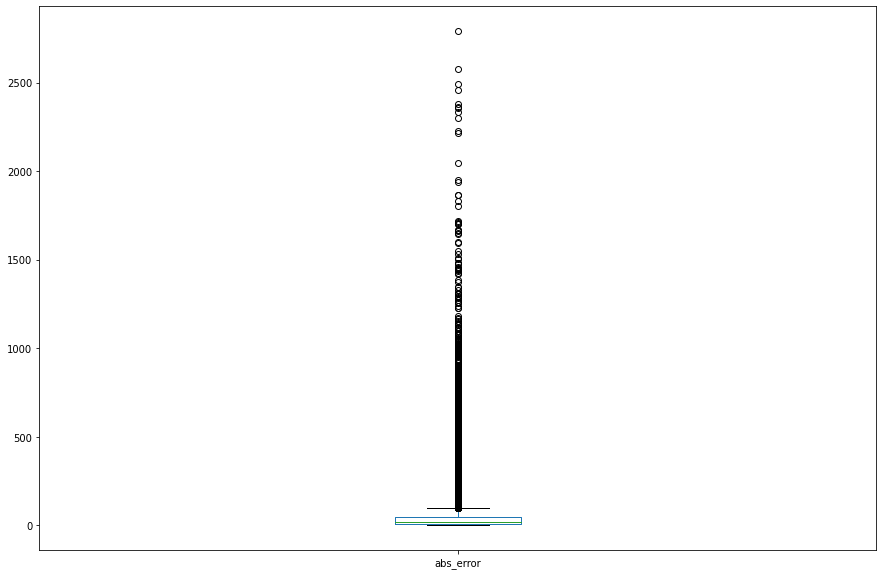

In [ ]:
X_test.boxplot(figsize=(15,10), column =['abs_error'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


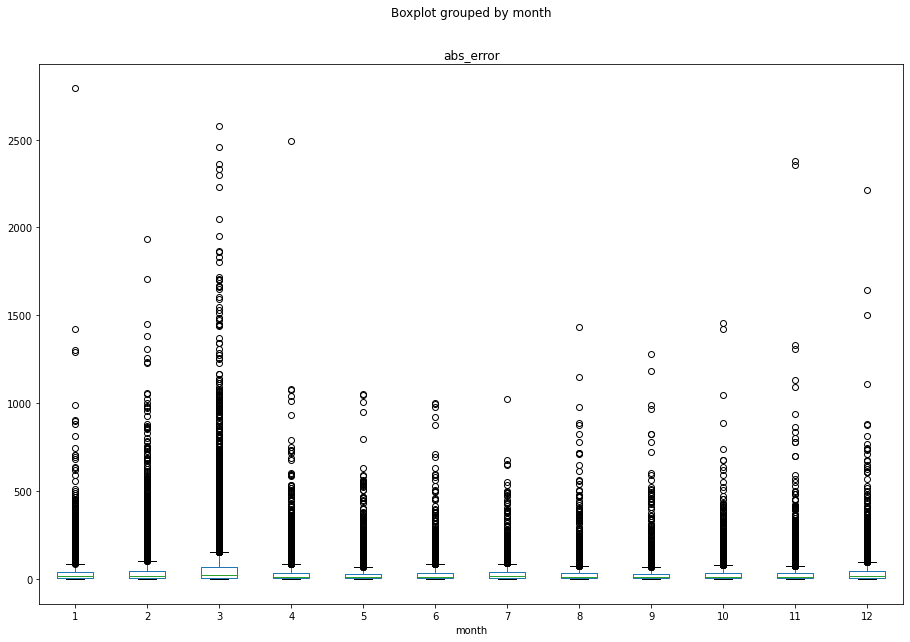

In [ ]:
X_test.boxplot(by ='month',figsize=(15,10), column =['abs_error'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


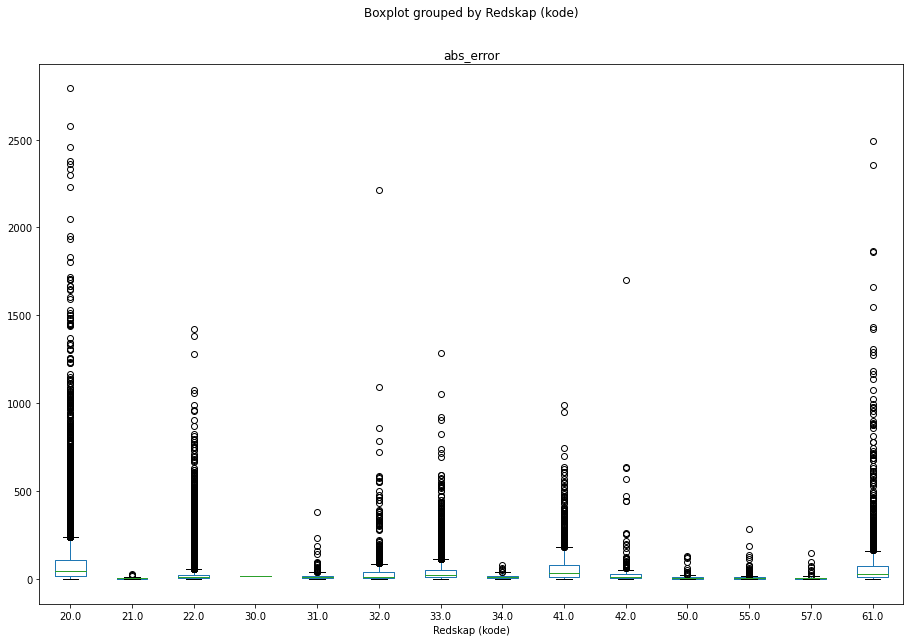

In [ ]:
X_test.boxplot(by ='Redskap (kode)',figsize=(15,10), column =['abs_error'], grid = False)

## month - error analysis

grouping by the months and summing over the absolute error to see which month/months has/have suffered max error

In [ ]:
# list_month = [1,2,3,4,5,6,7,8,9,10,11,12]
# list_freq_occurence_month = []
# for i in list_month:
#   list_freq_occurence_month.append(len(X_test[X_test['month'] == i]))

In [ ]:
# list_freq_occurence_month

In [ ]:
df_month_abserror = X_test.groupby(['month'])['abs_error'].agg('sum').rename_axis('month').reset_index(name='total_abs_error')
df_month_abserror

,month,total_abs_error
0,1,187354.234625
1,2,314713.455855
2,3,677943.848845
3,4,181471.132343
4,5,108171.540772
5,6,102545.024415
6,7,93358.465819
7,8,93549.947767
8,9,84120.349917
9,10,105544.838978


In [ ]:
list_months= df_month_abserror['month'].to_list()
list_months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
list_freq_occurence_month = []
for i in list_months:
  list_freq_occurence_month.append(len(X_test[X_test['month'] == i]))

In [ ]:
list_freq_occurence_month

[4486, 6358, 9011, 4586, 2946, 2568, 2320, 2345, 2326, 2674, 3092, 3033]

In [ ]:
df_month_abserror['freq_occurence_month'] = list_freq_occurence_month
df_month_abserror

,month,total_abs_error,freq_occurence_month
0,1,187354.234625,4486
1,2,314713.455855,6358
2,3,677943.848845,9011
3,4,181471.132343,4586
4,5,108171.540772,2946
5,6,102545.024415,2568
6,7,93358.465819,2320
7,8,93549.947767,2345
8,9,84120.349917,2326
9,10,105544.838978,2674


In [ ]:
df_month_abserror['avg_abs_error'] = df_month_abserror['total_abs_error']/df_month_abserror['freq_occurence_month']
df_month_abserror

,month,total_abs_error,freq_occurence_month,avg_abs_error
0,1,187354.234625,4486,41.764207
1,2,314713.455855,6358,49.498813
2,3,677943.848845,9011,75.235140
3,4,181471.132343,4586,39.570679
4,5,108171.540772,2946,36.718106
5,6,102545.024415,2568,39.931863
6,7,93358.465819,2320,40.240718
7,8,93549.947767,2345,39.893368
8,9,84120.349917,2326,36.165241
9,10,105544.838978,2674,39.470770


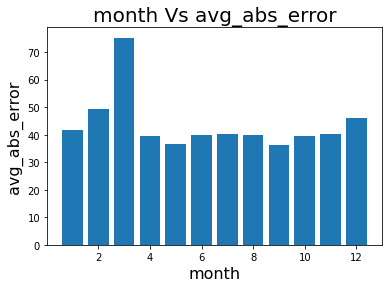

In [ ]:
plt.bar(df_month_abserror['month'], df_month_abserror['avg_abs_error'])
plt.title("month Vs avg_abs_error", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('avg_abs_error', fontsize=16)
plt.show()

## gear code - error analysis

grouping by the gears and summing over the absolute error to see which gears has/have suffered max error

In [ ]:
df_gear_abserror = X_test.groupby(['Redskap (kode)'])['abs_error'].agg('sum').rename_axis('gear_code').reset_index(name='total_abs_error')
df_gear_abserror

,gear_code,total_abs_error
0,20.0,845780.199142
1,21.0,369.846908
2,22.0,786835.666893
3,30.0,16.482028
4,31.0,4464.009099
5,32.0,42942.771369
6,33.0,197931.817205
7,34.0,1379.132582
8,41.0,130286.698921
9,42.0,12843.931549


In [ ]:
list_gears = df_gear_abserror['gear_code'].to_list()
list_gears

[20.0,
 21.0,
 22.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 41.0,
 42.0,
 50.0,
 55.0,
 57.0,
 61.0]

In [ ]:
list_freq_occurence_gear = []
for i in list_gears:
  list_freq_occurence_gear.append(len(X_test[X_test['Redskap (kode)'] == i]))

In [ ]:
list_freq_occurence_gear

[7840, 58, 27577, 1, 216, 891, 3983, 83, 1934, 315, 79, 406, 88, 2274]

In [ ]:
df_gear_abserror['freq_occurence_gear'] = list_freq_occurence_gear
df_gear_abserror

,gear_code,total_abs_error,freq_occurence_gear
0,20.0,845780.199142,7840
1,21.0,369.846908,58
2,22.0,786835.666893,27577
3,30.0,16.482028,1
4,31.0,4464.009099,216
5,32.0,42942.771369,891
6,33.0,197931.817205,3983
7,34.0,1379.132582,83
8,41.0,130286.698921,1934
9,42.0,12843.931549,315


In [ ]:
df_gear_abserror['avg_abs_error'] = df_gear_abserror['total_abs_error']/df_gear_abserror['freq_occurence_gear']
df_gear_abserror

,gear_code,total_abs_error,freq_occurence_gear,avg_abs_error
0,20.0,845780.199142,7840,107.880127
1,21.0,369.846908,58,6.376671
2,22.0,786835.666893,27577,28.532316
3,30.0,16.482028,1,16.482028
4,31.0,4464.009099,216,20.666709
5,32.0,42942.771369,891,48.196152
6,33.0,197931.817205,3983,49.694154
7,34.0,1379.132582,83,16.616055
8,41.0,130286.698921,1934,67.366442
9,42.0,12843.931549,315,40.774386


In [ ]:
df_gear_abserror['avg_abs_error'].max()

107.88012744156693

In [ ]:
df_gear_abserror[df_gear_abserror['avg_abs_error'] == df_gear_abserror['avg_abs_error'].max()]

,gear_code,total_abs_error,freq_occurence_gear,avg_abs_error
0,20.0,845780.199142,7840,107.880127


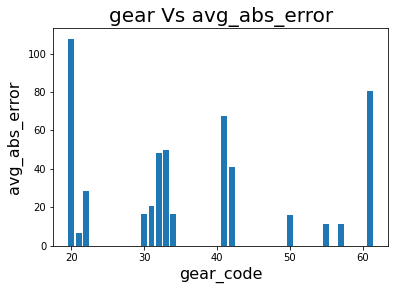

In [ ]:
plt.bar(df_gear_abserror['gear_code'], df_gear_abserror['avg_abs_error'])
plt.title("gear Vs avg_abs_error", fontsize = 20)
plt.xlabel('gear_code', fontsize=16)
plt.ylabel('avg_abs_error', fontsize=16)
plt.show()

## location  - error analysis

In [ ]:
# df_location_error = df_model_torsk[df_model_torsk.index.isin(X_test.index)]
# df_location_error = df_model_torsk.loc[df_model_torsk.index & X_test.index]
# df_location_error.head(10)

df_location_error  = df_model_torsk.loc[X_test.index]
df_location_error.head(10)
# df_model_torsk[ X_test.index].head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
21149911,7.71,20.0,1022,80706,8.0,5.50000,62.75000,6992.578813,110.0,2,0.822126
17480817,7.89,22.0,1022,80916,8.0,9.50000,58.75000,6585.589449,210.0,3,0.314944
8260940,9.73,22.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,3,0.502218
258029,7.53,22.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,1,0.383848
16350264,8.60,22.0,1022,80912,8.0,8.49357,58.26584,6521.988693,210.0,11,0.428939
3555086,9.45,33.0,1022,80719,8.0,6.50000,63.25000,7053.704686,211.0,3,0.317009
15621319,7.22,41.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,3,0.571625
668406,9.48,22.0,1022,82804,8.0,4.50000,61.75000,6876.834807,211.0,2,0.252943
5976036,8.85,20.0,1022,80706,8.0,5.50000,62.75000,6992.578813,110.0,3,0.629191
1306202,8.62,20.0,1022,80731,8.0,6.56240,62.76533,7000.652584,211.0,4,0.446653


In [ ]:
df_location_error['abs_error'] = df_test_error['actual_abs_error']
df_location_error.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt,abs_error
21149911,7.71,20.0,1022,80706,8.0,5.50000,62.75000,6992.578813,110.0,2,0.822126,251.120609
17480817,7.89,22.0,1022,80916,8.0,9.50000,58.75000,6585.589449,210.0,3,0.314944,8.616884
8260940,9.73,22.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,3,0.502218,71.684505
258029,7.53,22.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,1,0.383848,22.153818
16350264,8.60,22.0,1022,80912,8.0,8.49357,58.26584,6521.988693,210.0,11,0.428939,19.674500
3555086,9.45,33.0,1022,80719,8.0,6.50000,63.25000,7053.704686,211.0,3,0.317009,16.768939
15621319,7.22,41.0,102202,80707,8.0,7.49065,63.24359,7059.748712,211.0,3,0.571625,19.514374
668406,9.48,22.0,1022,82804,8.0,4.50000,61.75000,6876.834807,211.0,2,0.252943,28.816856
5976036,8.85,20.0,1022,80706,8.0,5.50000,62.75000,6992.578813,110.0,3,0.629191,147.652289
1306202,8.62,20.0,1022,80731,8.0,6.56240,62.76533,7000.652584,211.0,4,0.446653,20.505085


In [ ]:
df_location_error['Fangstfelt (kode)'].nunique()

72

In [ ]:
df_location_abserror = df_location_error.groupby(['Fangstfelt (kode)'])['abs_error'].agg('sum').rename_axis('area_code').reset_index(name='total_abs_error')
df_location_abserror
# .sort_values(['total_abs_error'], ascending=[False]).head(100)

,area_code,total_abs_error
0,00706,539.021695
1,00707,1487.590248
2,00718,6.257184
3,00719,2493.106985
4,00731,3356.092429
...,...,...
67,82804,106781.144550
68,82837,189.176006
69,82839,638.099864
70,82840,23279.516955


In [ ]:
list_locations = df_location_abserror['area_code'].to_list()
list_locations

['00706',
 '00707',
 '00718',
 '00719',
 '00731',
 '00801',
 '00803',
 '00807',
 '00808',
 '00809',
 '00812',
 '00813',
 '00817',
 '00906',
 '00908',
 '00909',
 '00912',
 '00913',
 '00916',
 '00917',
 '00925',
 '00930',
 '02802',
 '02804',
 '04155',
 '04167',
 '04172',
 '04176',
 '04177',
 '04193',
 '80705',
 '80706',
 '80707',
 '80719',
 '80726',
 '80728',
 '80729',
 '80730',
 '80731',
 '80732',
 '80733',
 '80734',
 '80735',
 '80801',
 '80802',
 '80803',
 '80815',
 '80816',
 '80817',
 '80818',
 '80819',
 '80820',
 '80821',
 '80856',
 '80908',
 '80912',
 '80913',
 '80916',
 '80917',
 '80920',
 '80922',
 '80924',
 '80925',
 '80930',
 '82801',
 '82802',
 '82803',
 '82804',
 '82837',
 '82839',
 '82840',
 '82841']

In [ ]:
location_latitude_dict = df_location_error.set_index('Fangstfelt (kode)').to_dict()['Lat (lokasjon)']
location_latitude_dict

{'00706': 62.75,
 '00707': 63.243590000000005,
 '00718': 63.25,
 '00719': 63.25,
 '00731': 62.765330000000006,
 '00801': 58.25,
 '00803': 59.25,
 '00807': 57.75,
 '00808': 57.75,
 '00809': 58.25,
 '00812': 58.75,
 '00813': 59.25,
 '00817': 58.25116,
 '00906': 57.25,
 '00908': 57.75,
 '00909': 57.75,
 '00912': 58.265840000000004,
 '00913': 58.25,
 '00916': 58.75,
 '00917': 58.75,
 '00925': 57.75,
 '00930': 57.81892,
 '02802': 60.76585,
 '02804': 61.75,
 '04155': 56.25,
 '04167': 56.75,
 '04172': 57.25,
 '04176': 57.25,
 '04177': 57.25,
 '04193': 57.24889,
 '80705': 62.25,
 '80706': 62.75,
 '80707': 63.243590000000005,
 '80719': 63.25,
 '80726': 63.3436,
 '80728': 63.31354,
 '80729': 63.00278,
 '80730': 62.8368,
 '80731': 62.765330000000006,
 '80732': 62.58036,
 '80733': 62.218109999999996,
 '80734': 62.441669999999995,
 '80735': 62.255269999999996,
 '80801': 58.25,
 '80802': 58.72558000000001,
 '80803': 59.25,
 '80815': 59.73966,
 '80816': 59.23466,
 '80817': 58.25116,
 '80818': 58.9255

In [ ]:
# location_latitude_dict['00003']

In [ ]:
location_longitude_dict = df_location_error.set_index('Fangstfelt (kode)').to_dict()['Lon (lokasjon)']
location_longitude_dict

{'00706': 5.5,
 '00707': 7.49065,
 '00718': 5.5,
 '00719': 6.5,
 '00731': 6.5624,
 '00801': 5.5,
 '00803': 4.5,
 '00807': 5.5,
 '00808': 6.5,
 '00809': 3.5,
 '00812': 4.5,
 '00813': 3.5,
 '00817': 6.56095,
 '00906': 8.5,
 '00908': 8.5,
 '00909': 9.5,
 '00912': 8.49357,
 '00913': 9.5,
 '00916': 9.5,
 '00917': 10.5,
 '00925': 7.5,
 '00930': 7.67022,
 '02802': 4.519880000000001,
 '02804': 4.5,
 '04155': 5.5,
 '04167': 7.5,
 '04172': 2.5,
 '04176': 6.5,
 '04177': 7.5,
 '04193': 7.49777,
 '80705': 4.5,
 '80706': 5.5,
 '80707': 7.49065,
 '80719': 6.5,
 '80726': 10.331430000000001,
 '80728': 8.9273,
 '80729': 8.59176,
 '80730': 8.03486,
 '80731': 6.5624,
 '80732': 7.656789999999999,
 '80733': 5.597519999999999,
 '80734': 6.21667,
 '80735': 6.777,
 '80801': 5.5,
 '80802': 5.43607,
 '80803': 4.5,
 '80815': 5.22302,
 '80816': 5.37624,
 '80817': 6.56095,
 '80818': 6.2079,
 '80819': 6.23771,
 '80820': 6.0157,
 '80821': 6.50397,
 '80856': 7.3025,
 '80908': 8.5,
 '80912': 8.49357,
 '80913': 9.5,
 '8

In [ ]:
list_freq_occurence_location = []
list_latitude = []
list_longitude = []
for i in list_locations:
  list_freq_occurence_location.append(len(df_location_error[df_location_error['Fangstfelt (kode)'] == i]))
  
for i in list_locations:
  list_latitude.append(location_latitude_dict[i])

for i in list_locations:
  list_longitude.append(location_longitude_dict[i])

In [ ]:
print(len(list_freq_occurence_location))
print(len(list_latitude))
print(len(list_longitude))

72
72
72


In [ ]:
list_freq_occurence_location

[8,
 38,
 1,
 48,
 21,
 70,
 10,
 4,
 1,
 2,
 3,
 2,
 116,
 21,
 15,
 243,
 64,
 7,
 20,
 2,
 23,
 13,
 7,
 13,
 1,
 1,
 3,
 19,
 640,
 4,
 65,
 2137,
 7605,
 554,
 467,
 2024,
 35,
 36,
 1617,
 379,
 3646,
 2047,
 1136,
 779,
 32,
 9,
 754,
 1623,
 855,
 166,
 721,
 328,
 82,
 1,
 1,
 3921,
 37,
 3961,
 37,
 2159,
 61,
 17,
 2476,
 65,
 238,
 230,
 415,
 2508,
 7,
 42,
 698,
 354]

In [ ]:
list_latitude

[62.75,
 63.243590000000005,
 63.25,
 63.25,
 62.765330000000006,
 58.25,
 59.25,
 57.75,
 57.75,
 58.25,
 58.75,
 59.25,
 58.25116,
 57.25,
 57.75,
 57.75,
 58.265840000000004,
 58.25,
 58.75,
 58.75,
 57.75,
 57.81892,
 60.76585,
 61.75,
 56.25,
 56.75,
 57.25,
 57.25,
 57.25,
 57.24889,
 62.25,
 62.75,
 63.243590000000005,
 63.25,
 63.3436,
 63.31354,
 63.00278,
 62.8368,
 62.765330000000006,
 62.58036,
 62.218109999999996,
 62.441669999999995,
 62.255269999999996,
 58.25,
 58.72558000000001,
 59.25,
 59.73966,
 59.23466,
 58.25116,
 58.925509999999996,
 59.3805,
 59.75166,
 60.21864,
 57.67004,
 57.75,
 58.265840000000004,
 58.25,
 58.75,
 58.75,
 59.25,
 59.75,
 58.108630000000005,
 57.75,
 57.81892,
 60.24815,
 60.76585,
 61.2617,
 61.75,
 61.5371,
 61.11448000000001,
 60.70822,
 60.22739]

In [ ]:
list_longitude

[5.5,
 7.49065,
 5.5,
 6.5,
 6.5624,
 5.5,
 4.5,
 5.5,
 6.5,
 3.5,
 4.5,
 3.5,
 6.56095,
 8.5,
 8.5,
 9.5,
 8.49357,
 9.5,
 9.5,
 10.5,
 7.5,
 7.67022,
 4.519880000000001,
 4.5,
 5.5,
 7.5,
 2.5,
 6.5,
 7.5,
 7.49777,
 4.5,
 5.5,
 7.49065,
 6.5,
 10.331430000000001,
 8.9273,
 8.59176,
 8.03486,
 6.5624,
 7.656789999999999,
 5.597519999999999,
 6.21667,
 6.777,
 5.5,
 5.43607,
 4.5,
 5.22302,
 5.37624,
 6.56095,
 6.2079,
 6.23771,
 6.0157,
 6.50397,
 7.3025,
 8.5,
 8.49357,
 9.5,
 9.5,
 10.5,
 10.5,
 10.5,
 7.5026600000000006,
 7.5,
 7.67022,
 4.50056,
 4.519880000000001,
 4.47778,
 4.5,
 5.5121,
 6.7887,
 5.52325,
 5.38093]

In [ ]:
df_location_abserror['freq_occurence_location'] = list_freq_occurence_location
df_location_abserror['latitude'] = list_latitude
df_location_abserror['longitude'] = list_longitude

In [ ]:
df_location_abserror

,area_code,total_abs_error,freq_occurence_location,latitude,longitude
0,00706,539.021695,8,62.75000,5.50000
1,00707,1487.590248,38,63.24359,7.49065
2,00718,6.257184,1,63.25000,5.50000
3,00719,2493.106985,48,63.25000,6.50000
4,00731,3356.092429,21,62.76533,6.56240
...,...,...,...,...,...
67,82804,106781.144550,2508,61.75000,4.50000
68,82837,189.176006,7,61.53710,5.51210
69,82839,638.099864,42,61.11448,6.78870
70,82840,23279.516955,698,60.70822,5.52325


In [ ]:
df_location_abserror.to_csv('south locations.csv')

In [ ]:
df_location_abserror['avg_abs_error'] = df_location_abserror['total_abs_error']/df_location_abserror['freq_occurence_location']
df_location_abserror = df_location_abserror.sort_values(['avg_abs_error'], ascending=[False])
df_location_abserror.head(30)

,area_code,total_abs_error,freq_occurence_location,latitude,longitude,avg_abs_error
4,00731,3356.092429,21,62.76533,6.56240,159.813925
14,00908,2352.172552,15,57.75000,8.50000,156.811503
31,80706,259693.491576,2137,62.75000,5.50000,121.522457
40,80733,410761.823225,3646,62.21811,5.59752,112.660950
28,04177,62625.473966,640,57.25000,7.50000,97.852303
41,80734,199632.189173,2047,62.44167,6.21667,97.524274
25,04167,94.177438,1,56.75000,7.50000,94.177438
15,00909,19549.922984,243,57.75000,9.50000,80.452358
13,00906,1666.987761,21,57.25000,8.50000,79.380370
30,80705,5106.967687,65,62.25000,4.50000,78.568734


In [ ]:
threshold = 50

In [ ]:
len(df_location_abserror[df_location_abserror['avg_abs_error'] > threshold])

20

In [ ]:
len(df_location_abserror[df_location_abserror['avg_abs_error'] < threshold])

52

In [ ]:
def error_type (row):
   if row['avg_abs_error'] < threshold:
      return 'low_error'
   else:
      return 'high_error'


In [ ]:
df_location_abserror['error_type'] = df_location_abserror.apply (lambda row: error_type(row), axis=1)

In [ ]:
df_location_abserror.head(10)

,area_code,total_abs_error,freq_occurence_location,latitude,longitude,avg_abs_error,error_type
4,00731,3356.092429,21,62.76533,6.56240,159.813925,high_error
14,00908,2352.172552,15,57.75000,8.50000,156.811503,high_error
31,80706,259693.491576,2137,62.75000,5.50000,121.522457,high_error
40,80733,410761.823225,3646,62.21811,5.59752,112.660950,high_error
28,04177,62625.473966,640,57.25000,7.50000,97.852303,high_error
41,80734,199632.189173,2047,62.44167,6.21667,97.524274,high_error
25,04167,94.177438,1,56.75000,7.50000,94.177438,high_error
15,00909,19549.922984,243,57.75000,9.50000,80.452358,high_error
13,00906,1666.987761,21,57.25000,8.50000,79.380370,high_error
30,80705,5106.967687,65,62.25000,4.50000,78.568734,high_error


In [ ]:
df_error_type = df_location_abserror['error_type'].value_counts().rename_axis('error_type').reset_index(name='counts')
df_error_type

,error_type,counts
0,low_error,52
1,high_error,20


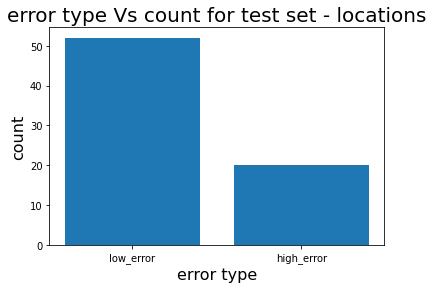

In [ ]:
plt.bar(df_error_type['error_type'], df_error_type['counts'])
plt.title("error type Vs count for test set - locations", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
lat_low_error = df_location_abserror[df_location_abserror['error_type'] == 'low_error']['latitude'].values
lon_low_error = df_location_abserror[df_location_abserror['error_type'] == 'low_error']['longitude'].values

lat_high_error = df_location_abserror[df_location_abserror['error_type'] == 'high_error']['latitude'].values
lon_high_error = df_location_abserror[df_location_abserror['error_type'] == 'high_error']['longitude'].values


In [ ]:
lat = df_location_abserror['latitude'].values
lon= df_location_abserror['longitude'].values

In [ ]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

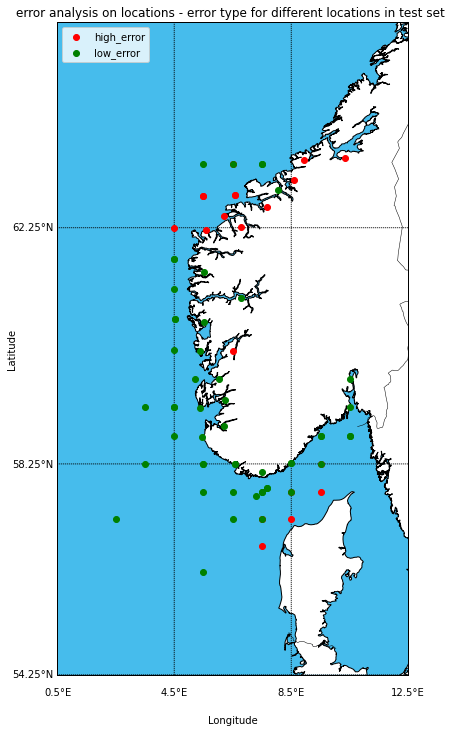

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m3(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m3(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error')
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error')

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

we need to decide the threshold of error for these vessels, since they are very small hence we set threshold as 100kg.

In [ ]:
threshold = 50

In [ ]:
def error_type (row):
   if row['actual_abs_error'] < threshold:
      return 'low_error'
   else:
      return 'high_error'


In [ ]:
df_test_error['error_type'] = df_test_error.apply (lambda row: error_type(row), axis=1)

In [ ]:
df_test_error.head(10)

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error,error_type
21149911,7.71,0.822126,0.746069,0.076058,566.0,314.879391,251.120609,high_error
17480817,7.89,0.314944,0.383537,0.068594,12.0,20.616884,8.616884,low_error
8260940,9.73,0.502218,0.422183,0.080035,132.5,60.815495,71.684505,high_error
258029,7.53,0.383848,0.490401,0.106553,18.0,40.153818,22.153818,low_error
16350264,8.60,0.428939,0.350218,0.078721,40.0,20.325500,19.674500,low_error
3555086,9.45,0.317009,0.381445,0.064436,20.0,36.768939,16.768939,low_error
15621319,7.22,0.571625,0.519275,0.052350,62.0,42.485626,19.514374,low_error
668406,9.48,0.252943,0.388638,0.135696,11.0,39.816856,28.816856,low_error
5976036,8.85,0.629191,0.535508,0.093684,262.0,114.347711,147.652289,high_error
1306202,8.62,0.446653,0.488655,0.042002,47.0,67.505085,20.505085,low_error


In [ ]:
df_error_type = df_test_error['error_type'].value_counts().rename_axis('error_type').reset_index(name='counts')
df_error_type

,error_type,counts
0,low_error,35569
1,high_error,10176


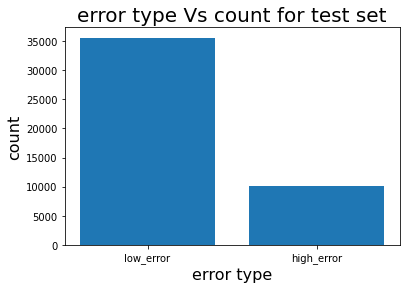

In [ ]:
plt.bar(df_error_type['error_type'], df_error_type['counts'])
plt.title("error type Vs count for test set", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

we attain the indexes of low_errors and high errors for further analysis

In [ ]:
X_test['error_type'] = df_test_error['error_type']
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102202,abs_error,error_type
21149911,7.71,20.0,8.0,5.50000,62.75000,6992.578813,110.0,2,1,0,251.120609,high_error
17480817,7.89,22.0,8.0,9.50000,58.75000,6585.589449,210.0,3,1,0,8.616884,low_error
8260940,9.73,22.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1,71.684505,high_error
258029,7.53,22.0,8.0,7.49065,63.24359,7059.748712,211.0,1,0,1,22.153818,low_error
16350264,8.60,22.0,8.0,8.49357,58.26584,6521.988693,210.0,11,1,0,19.674500,low_error
3555086,9.45,33.0,8.0,6.50000,63.25000,7053.704686,211.0,3,1,0,16.768939,low_error
15621319,7.22,41.0,8.0,7.49065,63.24359,7059.748712,211.0,3,0,1,19.514374,low_error
668406,9.48,22.0,8.0,4.50000,61.75000,6876.834807,211.0,2,1,0,28.816856,low_error
5976036,8.85,20.0,8.0,5.50000,62.75000,6992.578813,110.0,3,1,0,147.652289,high_error
1306202,8.62,20.0,8.0,6.56240,62.76533,7000.652584,211.0,4,1,0,20.505085,low_error


## we can see that for low error majority kyst code is 8 which means thet are close to coast and few outside the coast that yeild low error

In [ ]:
low_error_info = X_test[X_test['error_type'] == 'low_error']['Kyst/hav (kode)'].value_counts().rename_axis('kyst_code').reset_index(name='counts')
low_error_info

,kyst_code,counts
0,8.0,34659
1,0.0,910


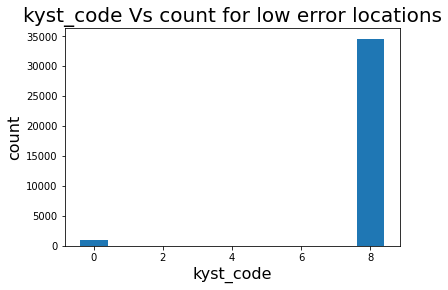

In [ ]:
plt.bar(low_error_info['kyst_code'], low_error_info['counts'])
plt.title("kyst_code Vs count for low error locations", fontsize = 20)
plt.xlabel('kyst_code', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

## we can see that for high error majority kyst code is 8 that is they lie close to coast  and a few outside that yeild high error

In [ ]:
high_error_info = X_test[X_test['error_type'] == 'high_error']['Kyst/hav (kode)'].value_counts().rename_axis('kyst_code').reset_index(name='counts')
high_error_info

,kyst_code,counts
0,8.0,9666
1,0.0,510


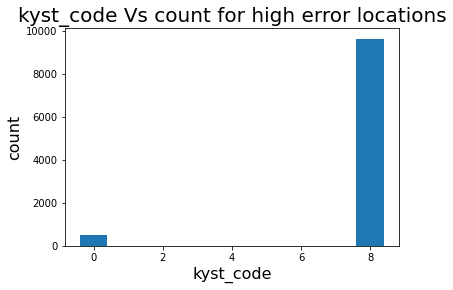

In [ ]:
plt.bar(high_error_info['kyst_code'], high_error_info['counts'])
plt.title("kyst_code Vs count for high error locations", fontsize = 20)
plt.xlabel('kyst_code', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

## location wise error analysis 

In [ ]:
lat_low_error = X_test[X_test['error_type'] == 'low_error']['Lat (lokasjon)'].values
lon_low_error= X_test[X_test['error_type'] == 'low_error']['Lon (lokasjon)'].values

lat_high_error = X_test[X_test['error_type'] == 'high_error']['Lat (lokasjon)'].values
lon_high_error = X_test[X_test['error_type'] == 'high_error']['Lon (lokasjon)'].values


In [ ]:
lat = X_test['Lat (lokasjon)'].values
lon= X_test['Lon (lokasjon)'].values

In [ ]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

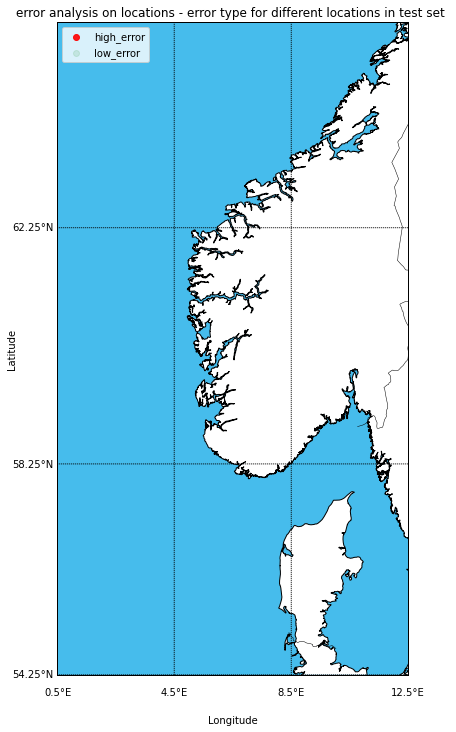

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error', alpha = 0.1)

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

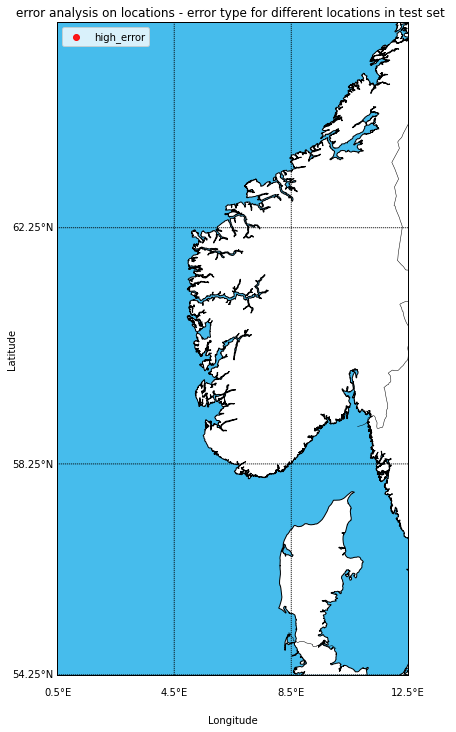

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
#m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error', alpha = 0.1)

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

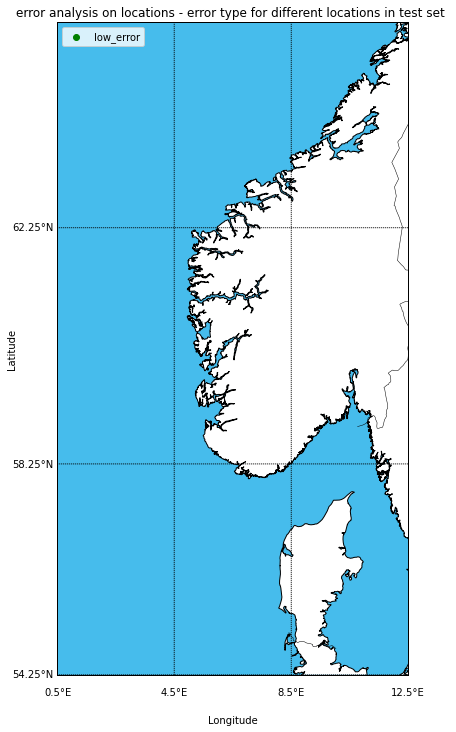

In [ ]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
#m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error')

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

## one problem that some red points are being overlapped by green dots

## month wise error analysis

In [ ]:
jan_error = X_test[X_test['month'] == 1]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jan_error

,error type,counts
0,low_error,3566
1,high_error,920


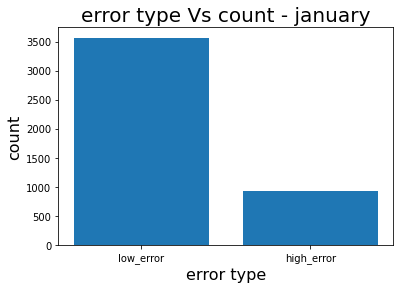

In [ ]:
plt.bar(jan_error['error type'], jan_error['counts'])
plt.title("error type Vs count - january", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
feb_error = X_test[X_test['month'] == 2]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
feb_error

,error type,counts
0,low_error,4864
1,high_error,1494


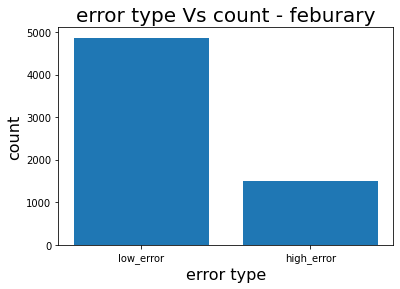

In [ ]:
plt.bar(feb_error['error type'], feb_error['counts'])
plt.title("error type Vs count - feburary", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
mar_error = X_test[X_test['month'] == 3]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
mar_error

,error type,counts
0,low_error,6156
1,high_error,2855


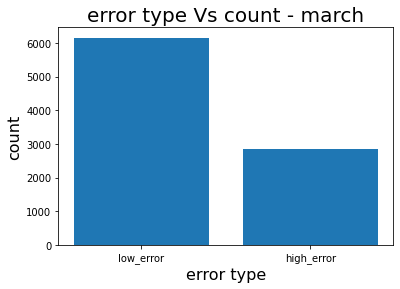

In [ ]:
plt.bar(mar_error['error type'], mar_error['counts'])
plt.title("error type Vs count - march", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
apr_error = X_test[X_test['month'] == 4]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
apr_error

,error type,counts
0,low_error,3696
1,high_error,890


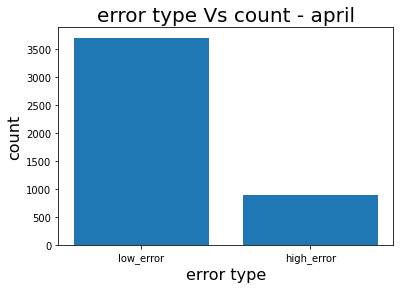

In [ ]:
plt.bar(apr_error['error type'], apr_error['counts'])
plt.title("error type Vs count - april", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
may_error = X_test[X_test['month'] == 5]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
may_error

,error type,counts
0,low_error,2466
1,high_error,480


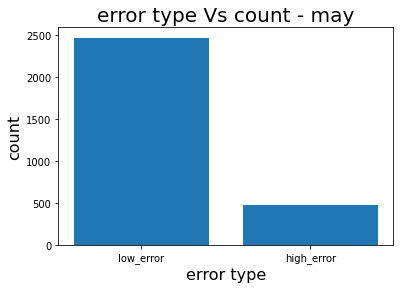

In [ ]:
plt.bar(may_error['error type'], may_error['counts'])
plt.title("error type Vs count - may", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
jun_error = X_test[X_test['month'] == 6]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jun_error

,error type,counts
0,low_error,2058
1,high_error,510


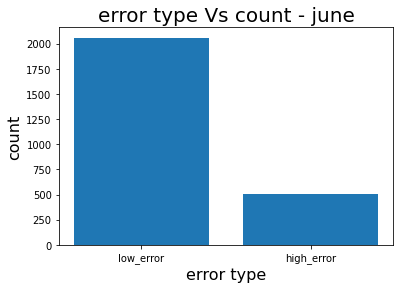

In [ ]:
plt.bar(jun_error['error type'], jun_error['counts'])
plt.title("error type Vs count - june", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
jul_error = X_test[X_test['month'] == 7]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jul_error

,error type,counts
0,low_error,1853
1,high_error,467


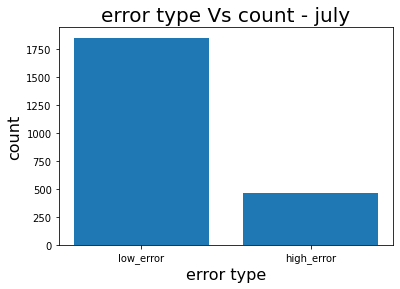

In [ ]:
plt.bar(jul_error['error type'], jul_error['counts'])
plt.title("error type Vs count - july", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
aug_error = X_test[X_test['month'] == 8]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
aug_error

,error type,counts
0,low_error,1913
1,high_error,432


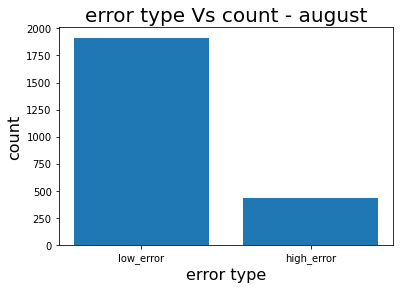

In [ ]:
plt.bar(aug_error['error type'], aug_error['counts'])
plt.title("error type Vs count - august", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
sep_error = X_test[X_test['month'] == 9]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
sep_error

,error type,counts
0,low_error,1942
1,high_error,384


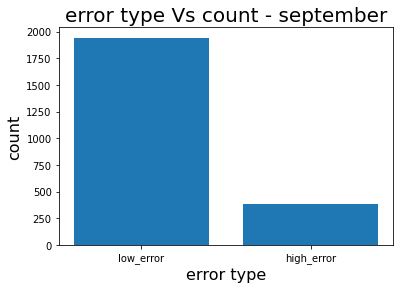

In [ ]:
plt.bar(sep_error['error type'], sep_error['counts'])
plt.title("error type Vs count - september", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
oct_error = X_test[X_test['month'] == 10]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
oct_error

,error type,counts
0,low_error,2165
1,high_error,509


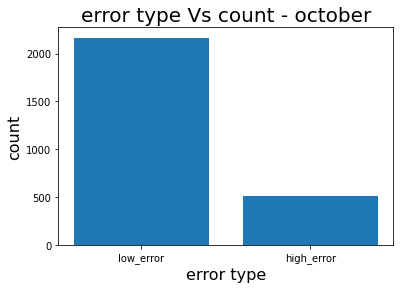

In [ ]:
plt.bar(oct_error['error type'], oct_error['counts'])
plt.title("error type Vs count - october", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
nov_error = X_test[X_test['month'] == 11]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
nov_error

,error type,counts
0,low_error,2546
1,high_error,546


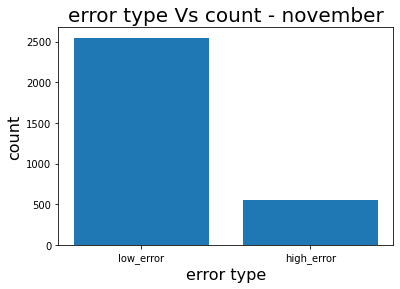

In [ ]:
plt.bar(nov_error['error type'], nov_error['counts'])
plt.title("error type Vs count - november", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
dec_error = X_test[X_test['month'] == 12]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
dec_error

,error type,counts
0,low_error,2344
1,high_error,689


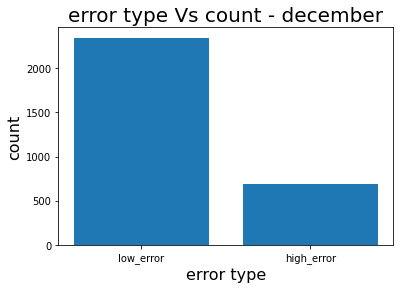

In [ ]:
plt.bar(dec_error['error type'], dec_error['counts'])
plt.title("error type Vs count - december", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [ ]:
list_months = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
high_error_month_frequency = []
for i in list_months:
  high_error_month_frequency.append(len(X_test[X_test['month'] == i][X_test['error_type'] == 'high_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [ ]:
 high_error_month_frequency

[920, 1494, 2855, 890, 480, 510, 467, 432, 384, 509, 546, 689]

In [ ]:
distribution_high_error = {'month':['jan', 'feb', 'mar','april' ,'may','jun','jul','aug','sep','oct','nov','dec'],
        'high_error_count': high_error_month_frequency}
  
# Create DataFrame
df_monthly_high_error = pd.DataFrame(distribution_high_error)
df_monthly_high_error

,month,high_error_count
0,jan,920
1,feb,1494
2,mar,2855
3,april,890
4,may,480
5,jun,510
6,jul,467
7,aug,432
8,sep,384
9,oct,509


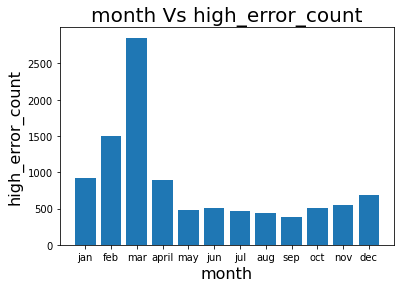

In [ ]:
plt.bar(df_monthly_high_error['month'], df_monthly_high_error['high_error_count'])
plt.title("month Vs high_error_count", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('high_error_count', fontsize=16)
plt.show()

In [ ]:
low_error_month_frequency = []
for i in list_months:
  low_error_month_frequency.append(len(X_test[X_test['month'] == i][X_test['error_type'] == 'low_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [ ]:
 low_error_month_frequency

[3566, 4864, 6156, 3696, 2466, 2058, 1853, 1913, 1942, 2165, 2546, 2344]

In [ ]:
distribution_low_error = {'month':['jan', 'feb', 'mar','april' ,'may','jun','jul','aug','sep','oct','nov','dec'],
        'low_error_count': low_error_month_frequency}
  
# Create DataFrame
df_monthly_low_error = pd.DataFrame(distribution_low_error)
df_monthly_low_error

,month,low_error_count
0,jan,3566
1,feb,4864
2,mar,6156
3,april,3696
4,may,2466
5,jun,2058
6,jul,1853
7,aug,1913
8,sep,1942
9,oct,2165


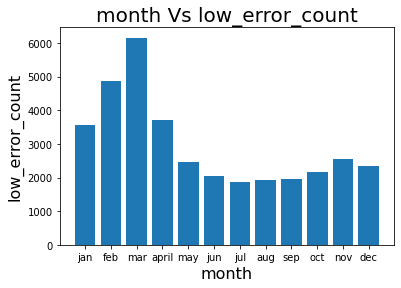

In [ ]:
plt.bar(df_monthly_low_error['month'], df_monthly_low_error['low_error_count'])
plt.title("month Vs low_error_count", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('low_error_count', fontsize=16)
plt.show()

## gear code wise error analysis

In [ ]:
list_gear_codes = X_test['Redskap (kode)'].unique()

In [ ]:
list_gear_codes

array([20., 22., 33., 41., 61., 32., 31., 21., 50., 55., 42., 34., 57.,
       30.])

In [ ]:
high_error_gears_frequency = []
for i in list_gear_codes:
  high_error_gears_frequency.append(len(X_test[X_test['Redskap (kode)'] == i][X_test['error_type'] == 'high_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [ ]:
high_error_gears_frequency

[3705, 3576, 1029, 773, 808, 188, 20, 0, 6, 16, 46, 4, 5, 0]

In [ ]:
distribution_high_error_gears = {'gear_code':list_gear_codes,
        'high_error_count': high_error_gears_frequency}
  
# Create DataFrame
df_gear_high_error = pd.DataFrame(distribution_high_error_gears)
df_gear_high_error

,gear_code,high_error_count
0,20.0,3705
1,22.0,3576
2,33.0,1029
3,41.0,773
4,61.0,808
5,32.0,188
6,31.0,20
7,21.0,0
8,50.0,6
9,55.0,16


## 33 and 22 are the gear codes in which highest no of high errors were recorded.

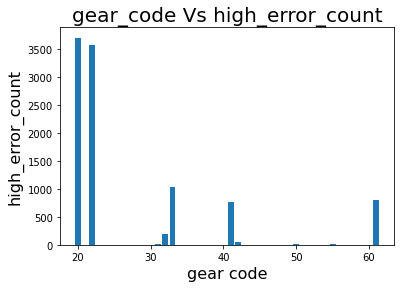

In [ ]:
plt.bar(df_gear_high_error['gear_code'], df_gear_high_error['high_error_count'])
plt.title("gear_code Vs high_error_count", fontsize = 20)
plt.xlabel('gear code', fontsize=16)
plt.ylabel('high_error_count', fontsize=16)
plt.show()

In [ ]:
low_error_gears_frequency = []
for i in list_gear_codes:
  low_error_gears_frequency.append(len(X_test[X_test['Redskap (kode)'] == i][X_test['error_type'] == 'low_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [ ]:
low_error_gears_frequency

[4135, 24001, 2954, 1161, 1466, 703, 196, 58, 73, 390, 269, 79, 83, 1]

In [ ]:
distribution_low_error_gears = {'gear_code':list_gear_codes,
        'low_error_count': low_error_gears_frequency}
  
# Create DataFrame
df_gear_low_error = pd.DataFrame(distribution_low_error_gears)
df_gear_low_error

,gear_code,low_error_count
0,20.0,4135
1,22.0,24001
2,33.0,2954
3,41.0,1161
4,61.0,1466
5,32.0,703
6,31.0,196
7,21.0,58
8,50.0,73
9,55.0,390


## again 33 and 22 are the gear codes where maximum no of low errors were recorded

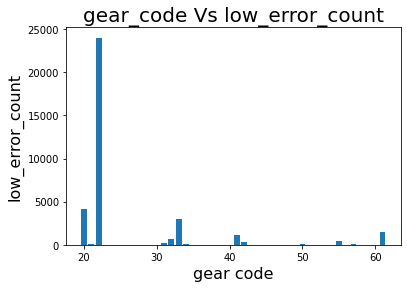

In [ ]:
plt.bar(df_gear_low_error['gear_code'], df_gear_low_error['low_error_count'])
plt.title("gear_code Vs low_error_count", fontsize = 20)
plt.xlabel('gear code', fontsize=16)
plt.ylabel('low_error_count', fontsize=16)
plt.show()

In [ ]:
# X_test[X_test['Redskap (kode)'] == 33]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')